In [1]:
# Reading the dataset
# Importing pandas library
import pandas as pd
# Loading the dataset
#lake = pd.read_csv('E:/XAI/LakeXAI.csv')
lake = pd.read_csv('C:/Users/Public/XAI/LakeXAI.csv')

In [2]:
!python --version

Python 3.9.19


In [3]:
# Installing pycaret
# pip install pycaret[full] # To install all the dependencies (full version)
import pycaret
pycaret.__version__ # To check the version

'3.0.4'

In [4]:
# condpip install scipy==1.11.4 to downgrade scipy
import scipy
print(scipy.__version__)

1.11.4


In [5]:
# conda install -c anaconda scikit-learn

In [6]:
import joblib

In [8]:
######## Importing pycaret regression and initializing setup
from pycaret.regression import *

In [9]:
######################################################

In [10]:
seed = 7

In [8]:
lake

,T,R_E,R_AT,R_P,G_E,G_AT,G_P,R_LL,G_LL
0,1/1/2013,0.635469,26.684000,0.060000,12.7,22.55,0.0,281.86,280.39
1,2/1/2013,0.409592,28.214000,0.000000,13.1,24.40,0.0,281.60,280.19
2,3/1/2013,0.501878,30.321000,0.450000,11.5,31.85,0.0,281.34,279.96
3,4/1/2013,1.896789,30.941000,2.530000,11.2,33.15,0.0,281.09,279.65
4,5/1/2013,11.177511,30.767000,8.780000,9.6,32.60,0.0,281.00,279.40
...,...,...,...,...,...,...,...,...,...
103,8/1/2021,54.353870,27.372797,111.480003,2.4,30.80,66.5,281.46,279.15
104,9/1/2021,55.176441,28.473566,85.570000,2.1,30.10,139.3,281.82,279.53
105,10/1/2021,27.200169,30.365717,25.629999,5.8,30.00,0.0,281.99,280.14
106,11/1/2021,4.567200,28.635095,0.000000,8.9,27.45,0.0,281.98,280.36


In [9]:
####### Creating subsets of the dataset

In [11]:
#### RS input - RS output (LL_R)
rsrs = lake[['R_E', 'R_AT', 'R_P', 'R_LL']]

In [12]:
rsrs

,R_E,R_AT,R_P,R_LL
0,0.635469,26.684000,0.060000,281.86
1,0.409592,28.214000,0.000000,281.60
2,0.501878,30.321000,0.450000,281.34
3,1.896789,30.941000,2.530000,281.09
4,11.177511,30.767000,8.780000,281.00
...,...,...,...,...
103,54.353870,27.372797,111.480003,281.46
104,55.176441,28.473566,85.570000,281.82
105,27.200169,30.365717,25.629999,281.99
106,4.567200,28.635095,0.000000,281.98


In [13]:
#### GT input - RS output (LL_R)
gtrs = lake[['G_E', 'G_AT', 'G_P', 'R_LL']]

In [14]:
gtrs

,G_E,G_AT,G_P,R_LL
0,12.7,22.55,0.0,281.86
1,13.1,24.40,0.0,281.60
2,11.5,31.85,0.0,281.34
3,11.2,33.15,0.0,281.09
4,9.6,32.60,0.0,281.00
...,...,...,...,...
103,2.4,30.80,66.5,281.46
104,2.1,30.10,139.3,281.82
105,5.8,30.00,0.0,281.99
106,8.9,27.45,0.0,281.98


In [15]:
#### RS input - GT output (LL_G)
rsgt = lake[['R_E', 'R_AT', 'R_P', 'G_LL']]

In [16]:
rsgt

,R_E,R_AT,R_P,G_LL
0,0.635469,26.684000,0.060000,280.39
1,0.409592,28.214000,0.000000,280.19
2,0.501878,30.321000,0.450000,279.96
3,1.896789,30.941000,2.530000,279.65
4,11.177511,30.767000,8.780000,279.40
...,...,...,...,...
103,54.353870,27.372797,111.480003,279.15
104,55.176441,28.473566,85.570000,279.53
105,27.200169,30.365717,25.629999,280.14
106,4.567200,28.635095,0.000000,280.36


In [17]:
#### GT input - GT output (LL_G)
gtgt = lake[['G_E', 'G_AT', 'G_P', 'G_LL']]

In [18]:
gtgt

,G_E,G_AT,G_P,G_LL
0,12.7,22.55,0.0,280.39
1,13.1,24.40,0.0,280.19
2,11.5,31.85,0.0,279.96
3,11.2,33.15,0.0,279.65
4,9.6,32.60,0.0,279.40
...,...,...,...,...
103,2.4,30.80,66.5,279.15
104,2.1,30.10,139.3,279.53
105,5.8,30.00,0.0,280.14
106,8.9,27.45,0.0,280.36


In [19]:
############# Remote sensing climate data as input - Remote sensing LL data as output ############

In [198]:
# RS input - RS output
mydata = setup(data = rsrs, target = 'R_LL', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,R_LL
2,Target type,Regression
3,Original data shape,"(108, 4)"
4,Transformed data shape,"(108, 4)"
5,Transformed train set shape,"(75, 4)"
6,Transformed test set shape,"(33, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [199]:
mydata

In [200]:
# To see all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [201]:
######## Model comparison

In [202]:
# Comparing models baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.2674,0.1147,0.3243,0.0457,0.0011,0.0009,0.7270
rf,Random Forest Regressor,0.2733,0.1194,0.3247,0.0430,0.0011,0.0010,0.4600
xgboost,Extreme Gradient Boosting,0.2716,0.1209,0.3365,0.0229,0.0012,0.0010,0.4550
et,Extra Trees Regressor,0.2804,0.1248,0.3372,-0.0554,0.0012,0.0010,0.7820
br,Bayesian Ridge,0.3057,0.1371,0.3624,-0.1090,0.0013,0.0011,0.3980
lr,Linear Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.4060
lar,Least Angle Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.4000
knn,K Neighbors Regressor,0.3047,0.1436,0.3620,-0.1466,0.0013,0.0011,0.3980
ridge,Ridge Regression,0.3184,0.1470,0.3721,-0.1470,0.0013,0.0011,0.3980
huber,Huber Regressor,0.3019,0.1388,0.3662,-0.1482,0.0013,0.0011,0.3850


In [203]:
#best = pull() # To get the results as a dataframe

In [204]:
#best

In [205]:
# To return the four best models based on the mse values
top4_best_models = compare_models(sort = 'MSE', n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.2674,0.1147,0.3243,0.0457,0.0011,0.0009,0.3570
rf,Random Forest Regressor,0.2733,0.1194,0.3247,0.0430,0.0011,0.0010,0.3630
xgboost,Extreme Gradient Boosting,0.2716,0.1209,0.3365,0.0229,0.0012,0.0010,0.3260
et,Extra Trees Regressor,0.2804,0.1248,0.3372,-0.0554,0.0012,0.0010,0.3660
lr,Linear Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.4610
lar,Least Angle Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.3820
br,Bayesian Ridge,0.3057,0.1371,0.3624,-0.1090,0.0013,0.0011,0.3820
huber,Huber Regressor,0.3019,0.1388,0.3662,-0.1482,0.0013,0.0011,0.3340
lightgbm,Light Gradient Boosting Machine,0.3043,0.1419,0.3626,-0.1752,0.0013,0.0011,0.3340
knn,K Neighbors Regressor,0.3047,0.1436,0.3620,-0.1466,0.0013,0.0011,0.3210


In [206]:
top4_best_models

[AdaBoostRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [208]:
top4_best_models = pull() # To get the results as a dataframe

In [209]:
top4_best_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.2674,0.1147,0.3243,0.0457,0.0011,0.0009,0.357
rf,Random Forest Regressor,0.2733,0.1194,0.3247,0.0430,0.0011,0.0010,0.363
xgboost,Extreme Gradient Boosting,0.2716,0.1209,0.3365,0.0229,0.0012,0.0010,0.326
et,Extra Trees Regressor,0.2804,0.1248,0.3372,-0.0554,0.0012,0.0010,0.366
lr,Linear Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.461
lar,Least Angle Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.382
br,Bayesian Ridge,0.3057,0.1371,0.3624,-0.1090,0.0013,0.0011,0.382
huber,Huber Regressor,0.3019,0.1388,0.3662,-0.1482,0.0013,0.0011,0.334
lightgbm,Light Gradient Boosting Machine,0.3043,0.1419,0.3626,-0.1752,0.0013,0.0011,0.334
knn,K Neighbors Regressor,0.3047,0.1436,0.3620,-0.1466,0.0013,0.0011,0.321


In [210]:
# Creating ada model
ada = create_model('ada', return_train_score = True)

In [211]:
ada = pull() # To get the results as a dataframe

In [212]:
ada

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1452  0.0285  0.1687  0.8479  0.0006  0.0005
         1     0.1514  0.0303  0.1742  0.8402  0.0006  0.0005
         2     0.1540  0.0325  0.1804  0.8285  0.0006  0.0005
         3     0.1530  0.0324  0.1799  0.8198  0.0006  0.0005
         4     0.1429  0.0279  0.1672  0.8436  0.0006  0.0005
         5     0.1549  0.0322  0.1793  0.8265  0.0006  0.0006
         6     0.1511  0.0335  0.1829  0.8313  0.0006  0.0005
         7     0.1470  0.0304  0.1744  0.8487  0.0006  0.0005
         8     0.1382  0.0276  0.1662  0.8598  0.0006  0.0005
         9     0.1221  0.0212  0.1456  0.8771  0.0005  0.0004
CV-Val   0     0.3174  0.1660  0.4075 -0.4858  0.0014  0.0011
         1     0.2169  0.0817  0.2859  0.4114  0.0010  0.0008
         2     0.1638  0.0406  0.2015  0.7608  0.0007  0.0006
         3     0.2653  0.1252  0.3538  0.1622  0.0013  0.0009
         4     0.2706  0.1567  0.3959  0.4216  0.0014  0.0010
         5     0.2646  0.0845  0.2906  0.2411  0.0010  0.0009
         6     0.1208  0.0207  0.1440  0.6644  0.0005  0.0004
         7     0.3475  0.1495  0.3867 -1.2718  0.0014  0.0012
         8     0.2441  0.0822  0.2866 -0.7469  0.0010  0.0009
         9     0.4631  0.2403  0.4902  0.2996  0.0017  0.0016
CV-Train Mean  0.1460  0.0297  0.1719  0.8423  0.0006  0.0005
         Std   0.0094  0.0034  0.0104  0.0163  0.0000  0.0000
CV-Val   Mean  0.2674  0.1147  0.3243  0.0457  0.0011  0.0009
         Std   0.0909  0.0624  0.0980  0.6270  0.0003  0.0003
Train    NaN   0.1464  0.0306  0.1750  0.8376  0.0006  0.0005

In [213]:
# Creating rf model
rf = create_model('rf', return_train_score = True)

In [214]:
rf = pull() # To get the results as a dataframe

In [216]:
# Creating xgboosy model
xgboost = create_model('xgboost', return_train_score = True)

In [217]:
xgboost = pull() # To get the results as a dataframe

In [218]:
xgboost

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0009  0.0000  0.0012  1.0000  0.0000  0.0000
         1     0.0013  0.0000  0.0018  1.0000  0.0000  0.0000
         2     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
         3     0.0012  0.0000  0.0016  1.0000  0.0000  0.0000
         4     0.0009  0.0000  0.0013  1.0000  0.0000  0.0000
         5     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         6     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         7     0.0009  0.0000  0.0013  1.0000  0.0000  0.0000
         8     0.0009  0.0000  0.0013  1.0000  0.0000  0.0000
         9     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
CV-Val   0     0.2964  0.1578  0.3973 -0.4124  0.0014  0.0011
         1     0.2671  0.1148  0.3389  0.1728  0.0012  0.0009
         2     0.1583  0.0567  0.2381  0.6661  0.0008  0.0006
         3     0.2367  0.1164  0.3412  0.2207  0.0012  0.0008
         4     0.3373  0.1757  0.4192  0.3514  0.0015  0.0012
         5     0.2316  0.0782  0.2796  0.2978  0.0010  0.0008
         6     0.1949  0.0482  0.2196  0.2197  0.0008  0.0007
         7     0.2404  0.0744  0.2728 -0.1307  0.0010  0.0009
         8     0.2727  0.1105  0.3324 -1.3500  0.0012  0.0010
         9     0.4802  0.2766  0.5259  0.1938  0.0019  0.0017
CV-Train Mean  0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         Std   0.0001  0.0000  0.0002  0.0000  0.0000  0.0000
CV-Val   Mean  0.2716  0.1209  0.3365  0.0229  0.0012  0.0010
         Std   0.0842  0.0649  0.0878  0.5315  0.0003  0.0003
Train    NaN   0.0012  0.0000  0.0016  1.0000  0.0000  0.0000

In [219]:
# Creaying et model
et = create_model('et', return_train_score = True)

In [220]:
et = pull() # To get the results as a dataframe

In [221]:
et

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         1     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         2     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         3     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         4     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         5     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         6     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         7     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         8     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         9     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
CV-Val   0     0.3108  0.1421  0.3770 -0.2718  0.0013  0.0011
         1     0.3063  0.1443  0.3798 -0.0393  0.0013  0.0011
         2     0.1613  0.0416  0.2039  0.7552  0.0007  0.0006
         3     0.2942  0.1613  0.4016 -0.0794  0.0014  0.0010
         4     0.2275  0.0718  0.2679  0.7351  0.0009  0.0008
         5     0.3012  0.1278  0.3575 -0.1485  0.0013  0.0011
         6     0.0985  0.0227  0.1505  0.6333  0.0005  0.0003
         7     0.3481  0.1596  0.3995 -1.4249  0.0014  0.0012
         8     0.2441  0.0880  0.2966 -0.8708  0.0010  0.0009
         9     0.5122  0.2891  0.5377  0.1574  0.0019  0.0018
CV-Train Mean  0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         Std   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
CV-Val   Mean  0.2804  0.1248  0.3372 -0.0554  0.0012  0.0010
         Std   0.1058  0.0719  0.1054  0.6632  0.0004  0.0004
Train    NaN   0.0000  0.0000  0.0000  1.0000  0.0000  0.0000

In [222]:
# To install xgboost: conda install -c anaconda py-xgboost

In [223]:
# Comparing four models
four_models = compare_models(include = ['lr', 'svm', 'rf', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,0.2766,0.1134,0.3195,0.1579,0.0011,0.0010,0.3320
rf,Random Forest Regressor,0.2733,0.1194,0.3247,0.0430,0.0011,0.0010,0.3650
xgboost,Extreme Gradient Boosting,0.2716,0.1209,0.3365,0.0229,0.0012,0.0010,0.3300
lr,Linear Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.3490


In [224]:
four_models_results = pull() # To get the results as a dataframe

In [225]:
four_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,0.2766,0.1134,0.3195,0.1579,0.0011,0.0010,0.332
rf,Random Forest Regressor,0.2733,0.1194,0.3247,0.0430,0.0011,0.0010,0.365
xgboost,Extreme Gradient Boosting,0.2716,0.1209,0.3365,0.0229,0.0012,0.0010,0.330
lr,Linear Regression,0.3045,0.1369,0.3638,-0.1252,0.0013,0.0011,0.349


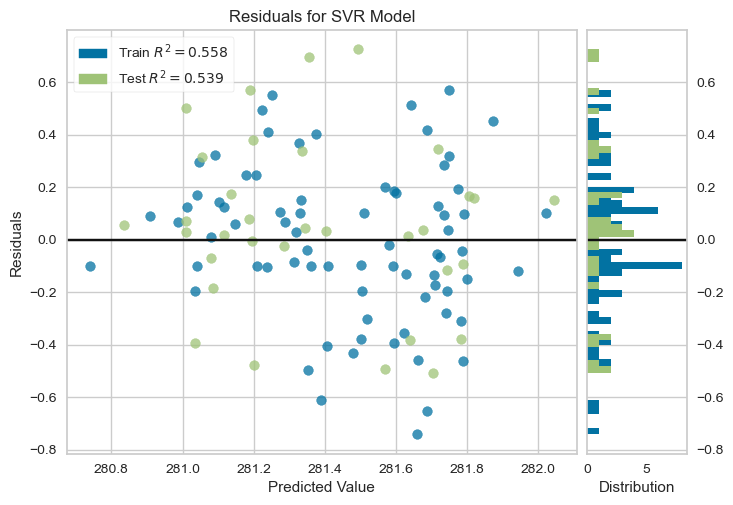

In [48]:
# PLotting the residuals for the four models
plot_model(four_models, plot = 'residuals')

In [50]:
# Plotting the feature importance
# plot_model(four_models, plot = 'feature')

In [226]:
# Creating svm model
svm = create_model('svm', return_train_score = True)

In [227]:
svm = pull() # To get the results as a dataframe

In [228]:
svm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2318  0.0838  0.2895  0.5524  0.0010  0.0008
         1     0.2278  0.0825  0.2873  0.5654  0.0010  0.0008
         2     0.2360  0.0856  0.2926  0.5491  0.0010  0.0008
         3     0.2269  0.0828  0.2877  0.5390  0.0010  0.0008
         4     0.2295  0.0883  0.2971  0.5059  0.0011  0.0008
         5     0.2299  0.0838  0.2894  0.5481  0.0010  0.0008
         6     0.2427  0.0898  0.2996  0.5474  0.0011  0.0009
         7     0.2262  0.0829  0.2879  0.5878  0.0010  0.0008
         8     0.2355  0.0885  0.2975  0.5510  0.0011  0.0008
         9     0.2068  0.0649  0.2548  0.6237  0.0009  0.0007
CV-Val   0     0.2541  0.0945  0.3074  0.1545  0.0011  0.0009
         1     0.2991  0.1635  0.4043 -0.1777  0.0014  0.0011
         2     0.2364  0.0711  0.2666  0.5815  0.0009  0.0008
         3     0.3244  0.1501  0.3874 -0.0046  0.0014  0.0012
         4     0.3028  0.1151  0.3392  0.5752  0.0012  0.0011
         5     0.2430  0.0800  0.2828  0.2814  0.0010  0.0009
         6     0.0912  0.0124  0.1115  0.7989  0.0004  0.0003
         7     0.2846  0.1075  0.3279 -0.6336  0.0012  0.0010
         8     0.2066  0.0548  0.2340 -0.1645  0.0008  0.0007
         9     0.5233  0.2854  0.5342  0.1682  0.0019  0.0019
CV-Train Mean  0.2293  0.0833  0.2883  0.5570  0.0010  0.0008
         Std   0.0089  0.0066  0.0120  0.0295  0.0000  0.0000
CV-Val   Mean  0.2766  0.1134  0.3195  0.1579  0.0011  0.0010
         Std   0.1034  0.0710  0.1064  0.4061  0.0004  0.0004
Train    NaN   0.2313  0.0833  0.2885  0.5583  0.0010  0.0008

In [229]:
# Creating linear model
lm = create_model('lr', return_train_score = True)

In [230]:
lm = pull() # To get the results as a dataframe

In [231]:
lm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2886  0.1218  0.3491  0.3492  0.0012  0.0010
         1     0.2770  0.1133  0.3366  0.4036  0.0012  0.0010
         2     0.2825  0.1187  0.3445  0.3749  0.0012  0.0010
         3     0.2795  0.1170  0.3421  0.3484  0.0012  0.0010
         4     0.2739  0.1170  0.3421  0.3447  0.0012  0.0010
         5     0.2896  0.1221  0.3494  0.3415  0.0012  0.0010
         6     0.3002  0.1292  0.3594  0.3485  0.0013  0.0011
         7     0.2881  0.1202  0.3466  0.4024  0.0012  0.0010
         8     0.2875  0.1257  0.3545  0.3623  0.0013  0.0010
         9     0.2715  0.1137  0.3372  0.3407  0.0012  0.0010
CV-Val   0     0.2617  0.1148  0.3388 -0.0274  0.0012  0.0009
         1     0.3420  0.1900  0.4359 -0.3686  0.0015  0.0012
         2     0.3200  0.1509  0.3885  0.1110  0.0014  0.0011
         3     0.3364  0.1662  0.4077 -0.1127  0.0014  0.0012
         4     0.3659  0.1581  0.3976  0.4164  0.0014  0.0013
         5     0.3085  0.1243  0.3526 -0.1171  0.0012  0.0011
         6     0.1626  0.0474  0.2178  0.2326  0.0008  0.0006
         7     0.2940  0.1454  0.3814 -1.2095  0.0013  0.0010
         8     0.2406  0.0756  0.2749 -0.6066  0.0010  0.0009
         9     0.4133  0.1957  0.4424  0.4297  0.0016  0.0015
CV-Train Mean  0.2838  0.1199  0.3461  0.3616  0.0012  0.0010
         Std   0.0082  0.0048  0.0069  0.0229  0.0000  0.0000
CV-Val   Mean  0.3045  0.1369  0.3638 -0.1252  0.0013  0.0011
         Std   0.0667  0.0450  0.0673  0.4756  0.0002  0.0002
Train    NaN   0.2855  0.1208  0.3475  0.3592  0.0012  0.0010

In [41]:
######## Analysing the performance of the model

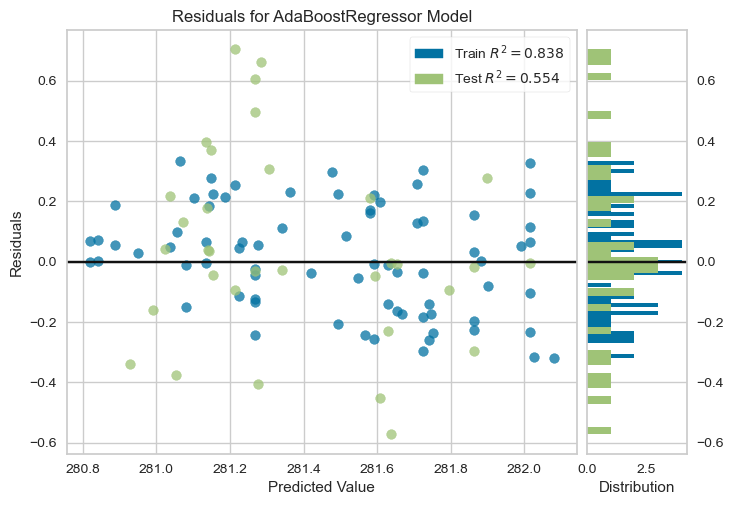

In [62]:
# PLotting the residuals
plot_model(best, plot = 'residuals')

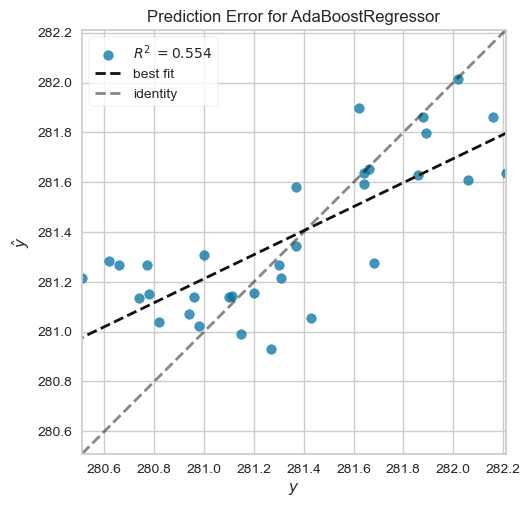

In [63]:
# PLotting the errors
plot_model(best, plot = 'error')

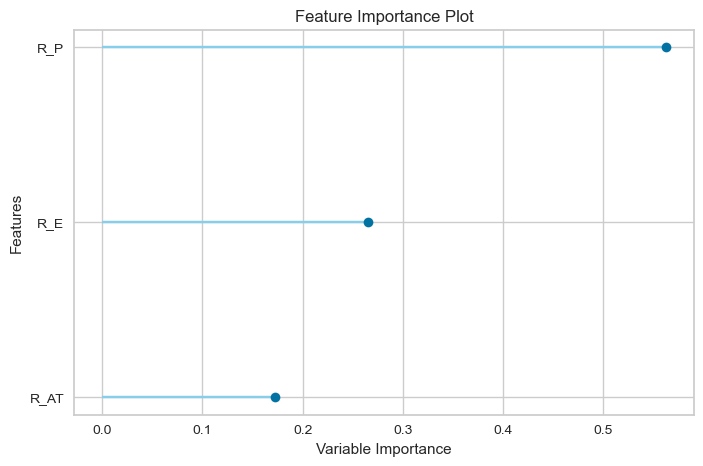

In [64]:
# Plotting the feature importance
plot_model(best, plot = 'feature')

In [32]:
# Analysing the performance of the model using evaluate_models\() function
evaluate_model(best)
#interactive(children=(toggleButtons(description='Plot Type:', icons = ('',), options = (('Pipeline Plot', 'pipeline')))))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [205]:
# Accessing all the variables created by setup() function
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [25]:
# Exporting X_train
from pycaret.datasets import get_data
X_train = get_config('X_train_transformed')

In [207]:
######## Prediction

In [31]:
# Prediction on the training dataset
train_pred = predict_model(best, data = X_train)

In [209]:
train_pred.head() # Showing the prediction dataframe

,R_E,R_AT,R_P,prediction_label
72,0.001392,0.194578,0.000261,281.630005
21,0.448791,0.492574,0.096186,281.589086
50,0.001082,0.518220,0.001957,281.630005
94,0.041227,0.450698,0.000043,281.630005
105,0.370094,0.751526,0.111449,281.707504


In [210]:
# Prediction on the testing dataset
test_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.2388,0.1002,0.3166,0.5540,0.0011,0.0008


In [211]:
test_pred.head() # Showing the prediction dataframe

,R_E,R_AT,R_P,R_LL,prediction_label
84,0.612919,22.286737,0.060000,282.059998,281.607498
100,7.432651,31.986414,4.630000,281.149994,280.990831
87,1.795772,31.717493,1.420000,281.429993,281.052856
42,75.063759,29.896845,158.259995,280.739990,281.135839
62,0.841100,29.749628,8.030000,281.309998,281.215001


In [212]:
# Saving the model
save_model(best, 'rsrs_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['R_E', 'R_AT', 'R_P'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', AdaBoostRegressor(random_state=123))]),
 'rsrs_best.pkl')

In [213]:
# Interpret Model SHAP
# conda install conda-forge::shap
# interpret_model(best, plot = 'summary')
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [214]:
# Reason plot
# interpret_model(best, plot = 'reason', observation = 1)
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [215]:
# automl()

In [216]:
# Explconda install conda-forge::explainerdashboardainer Dashboard
# conda install conda-forge::explainerdashboard

In [217]:
# conda install conda-forge::dash 
#dashboard(best, display_format = 'inline')

In [218]:
# Creating a gradio App
# conda install conda-forge::gradio
#create_app(best)

In [219]:
# Creating a POST API
# conda install conda-forge::fastapi
create_api(best, api_name = 'rsrsbest_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python rsrsbest_api.py


In [220]:
# The best model
best = pull() # To get the results as a dataframe

In [221]:
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.2388,0.1002,0.3166,0.554,0.0011,0.0008


In [65]:
###################################################################################################

In [66]:
############# Groundtruth climate data as input - Remote sensing LL data as output ############

In [232]:
# GT input - RS output
mydata = setup(data = gtrs, target = 'R_LL', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,R_LL
2,Target type,Regression
3,Original data shape,"(108, 4)"
4,Transformed data shape,"(108, 4)"
5,Transformed train set shape,"(75, 4)"
6,Transformed test set shape,"(33, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [233]:
mydata

In [234]:
# To see all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [235]:
######## Model comparison

In [236]:
# Comparing models baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1992,0.0676,0.2463,0.3530,0.0009,0.0007,0.3790
et,Extra Trees Regressor,0.1936,0.0679,0.2442,0.3453,0.0009,0.0007,0.3900
knn,K Neighbors Regressor,0.2198,0.0733,0.2617,0.3087,0.0009,0.0008,0.3230
lightgbm,Light Gradient Boosting Machine,0.2331,0.0821,0.2765,0.2702,0.0010,0.0008,0.3340
ada,AdaBoost Regressor,0.2219,0.0781,0.2637,0.2220,0.0009,0.0008,0.3560
xgboost,Extreme Gradient Boosting,0.2103,0.0804,0.2695,0.2034,0.0010,0.0007,0.3400
gbr,Gradient Boosting Regressor,0.2105,0.0862,0.2743,0.1458,0.0010,0.0007,0.3620
br,Bayesian Ridge,0.2793,0.1206,0.3317,-0.0089,0.0012,0.0010,0.3570
ridge,Ridge Regression,0.2896,0.1254,0.3386,-0.0139,0.0012,0.0010,0.3220
lar,Least Angle Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.3200


In [237]:
# To return the four best models based on the mse values
top4_best_models = compare_models(sort = 'MSE', n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1992,0.0676,0.2463,0.3530,0.0009,0.0007,0.3820
et,Extra Trees Regressor,0.1936,0.0679,0.2442,0.3453,0.0009,0.0007,0.3800
knn,K Neighbors Regressor,0.2198,0.0733,0.2617,0.3087,0.0009,0.0008,0.3210
ada,AdaBoost Regressor,0.2219,0.0781,0.2637,0.2220,0.0009,0.0008,0.3610
xgboost,Extreme Gradient Boosting,0.2103,0.0804,0.2695,0.2034,0.0010,0.0007,0.3380
lightgbm,Light Gradient Boosting Machine,0.2331,0.0821,0.2765,0.2702,0.0010,0.0008,0.3440
gbr,Gradient Boosting Regressor,0.2105,0.0862,0.2743,0.1458,0.0010,0.0007,0.3670
lr,Linear Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.3550
lar,Least Angle Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.3300
br,Bayesian Ridge,0.2793,0.1206,0.3317,-0.0089,0.0012,0.0010,0.3300


In [238]:
top4_best_models

[RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(random_state=123)]

In [239]:
top4_best_models = pull() # To get the results as a dataframe

In [240]:
top4_best_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1992,0.0676,0.2463,0.3530,0.0009,0.0007,0.382
et,Extra Trees Regressor,0.1936,0.0679,0.2442,0.3453,0.0009,0.0007,0.380
knn,K Neighbors Regressor,0.2198,0.0733,0.2617,0.3087,0.0009,0.0008,0.321
ada,AdaBoost Regressor,0.2219,0.0781,0.2637,0.2220,0.0009,0.0008,0.361
xgboost,Extreme Gradient Boosting,0.2103,0.0804,0.2695,0.2034,0.0010,0.0007,0.338
lightgbm,Light Gradient Boosting Machine,0.2331,0.0821,0.2765,0.2702,0.0010,0.0008,0.344
gbr,Gradient Boosting Regressor,0.2105,0.0862,0.2743,0.1458,0.0010,0.0007,0.367
lr,Linear Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.355
lar,Least Angle Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.330
br,Bayesian Ridge,0.2793,0.1206,0.3317,-0.0089,0.0012,0.0010,0.330


In [241]:
# Creating rf model
rf = create_model('rf', return_train_score = True)

In [242]:
rf = pull() # To get the results as a dataframe

In [243]:
rf

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0716  0.0100  0.0999  0.9466  0.0004  0.0003
         1     0.0727  0.0101  0.1007  0.9466  0.0004  0.0003
         2     0.0689  0.0095  0.0976  0.9499  0.0003  0.0002
         3     0.0729  0.0085  0.0923  0.9526  0.0003  0.0003
         4     0.0725  0.0096  0.0979  0.9463  0.0003  0.0003
         5     0.0726  0.0101  0.1003  0.9457  0.0004  0.0003
         6     0.0720  0.0096  0.0980  0.9516  0.0003  0.0003
         7     0.0743  0.0091  0.0956  0.9546  0.0003  0.0003
         8     0.0697  0.0086  0.0925  0.9566  0.0003  0.0002
         9     0.0557  0.0061  0.0782  0.9645  0.0003  0.0002
CV-Val   0     0.1163  0.0273  0.1653  0.7553  0.0006  0.0004
         1     0.2466  0.0762  0.2761  0.4508  0.0010  0.0009
         2     0.2087  0.0560  0.2366  0.6702  0.0008  0.0007
         3     0.1946  0.1048  0.3238  0.2983  0.0011  0.0007
         4     0.1288  0.0236  0.1538  0.9127  0.0005  0.0005
         5     0.1380  0.0222  0.1489  0.8007  0.0005  0.0005
         6     0.1270  0.0224  0.1496  0.6379  0.0005  0.0005
         7     0.2681  0.1195  0.3457 -0.8159  0.0012  0.0010
         8     0.2362  0.0833  0.2886 -0.7712  0.0010  0.0008
         9     0.3281  0.1403  0.3746  0.5911  0.0013  0.0012
CV-Train Mean  0.0703  0.0091  0.0953  0.9515  0.0003  0.0002
         Std   0.0051  0.0011  0.0064  0.0056  0.0000  0.0000
CV-Val   Mean  0.1992  0.0676  0.2463  0.3530  0.0009  0.0007
         Std   0.0677  0.0418  0.0831  0.5964  0.0003  0.0002
Train    NaN   0.0695  0.0089  0.0944  0.9527  0.0003  0.0002

In [244]:
# Creating et model
et = create_model('et', return_train_score = True)

In [245]:
et = pull() # To get the results as a dataframe

In [246]:
et

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         1     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         2     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         3     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         4     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         5     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         6     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         7     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         8     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         9     0.0001  0.0000  0.0002  1.0000  0.0000  0.0000
CV-Val   0     0.1432  0.0532  0.2307  0.5237  0.0008  0.0005
         1     0.2046  0.0493  0.2220  0.6449  0.0008  0.0007
         2     0.2294  0.0743  0.2725  0.5626  0.0010  0.0008
         3     0.1643  0.0876  0.2959  0.4138  0.0010  0.0006
         4     0.1210  0.0198  0.1408  0.9268  0.0005  0.0004
         5     0.1130  0.0137  0.1173  0.8765  0.0004  0.0004
         6     0.1221  0.0177  0.1331  0.7134  0.0005  0.0004
         7     0.3019  0.1534  0.3917 -1.3305  0.0014  0.0011
         8     0.2113  0.0690  0.2626 -0.4664  0.0009  0.0008
         9     0.3253  0.1412  0.3758  0.5884  0.0013  0.0012
CV-Train Mean  0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         Std   0.0000  0.0000  0.0001  0.0000  0.0000  0.0000
CV-Val   Mean  0.1936  0.0679  0.2442  0.3453  0.0009  0.0007
         Std   0.0714  0.0463  0.0909  0.6675  0.0003  0.0003
Train    NaN   0.0000  0.0000  0.0000  1.0000  0.0000  0.0000

In [247]:
# Creating knn model
knn = create_model('knn', return_train_score = True)

In [248]:
knn = pull() # To get the results as a dataframe

In [249]:
knn

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1836  0.0521  0.2283  0.7215  0.0008  0.0007
         1     0.1609  0.0422  0.2054  0.7779  0.0007  0.0006
         2     0.1660  0.0451  0.2123  0.7626  0.0008  0.0006
         3     0.1775  0.0493  0.2220  0.7255  0.0008  0.0006
         4     0.1772  0.0496  0.2227  0.7223  0.0008  0.0006
         5     0.1687  0.0450  0.2121  0.7574  0.0008  0.0006
         6     0.1790  0.0498  0.2231  0.7490  0.0008  0.0006
         7     0.1586  0.0409  0.2022  0.7966  0.0007  0.0006
         8     0.1675  0.0425  0.2062  0.7842  0.0007  0.0006
         9     0.1513  0.0376  0.1940  0.7817  0.0007  0.0005
CV-Val   0     0.1620  0.0400  0.2000  0.6419  0.0007  0.0006
         1     0.2560  0.0954  0.3089  0.3126  0.0011  0.0009
         2     0.1940  0.0451  0.2123  0.7345  0.0008  0.0007
         3     0.2108  0.0773  0.2780  0.4825  0.0010  0.0007
         4     0.1508  0.0282  0.1678  0.8960  0.0006  0.0005
         5     0.2360  0.0846  0.2908  0.2403  0.0010  0.0008
         6     0.1246  0.0268  0.1637  0.5664  0.0006  0.0004
         7     0.3029  0.1156  0.3400 -0.7564  0.0012  0.0011
         8     0.2086  0.0757  0.2752 -0.6104  0.0010  0.0007
         9     0.3526  0.1443  0.3799  0.5794  0.0013  0.0013
CV-Train Mean  0.1690  0.0454  0.2128  0.7579  0.0008  0.0006
         Std   0.0098  0.0044  0.0105  0.0263  0.0000  0.0000
CV-Val   Mean  0.2198  0.0733  0.2617  0.3087  0.0009  0.0008
         Std   0.0664  0.0368  0.0695  0.5283  0.0002  0.0002
Train    NaN   0.1626  0.0423  0.2058  0.7753  0.0007  0.0006

In [250]:
# Creating ada model
ada = create_model('ada', return_train_score = True)

In [251]:
ada = pull() # To get the results as a dataframe

In [252]:
ada

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1294  0.0219  0.1479  0.8831  0.0005  0.0005
         1     0.1141  0.0198  0.1407  0.8958  0.0005  0.0004
         2     0.1207  0.0204  0.1427  0.8927  0.0005  0.0004
         3     0.1261  0.0208  0.1441  0.8844  0.0005  0.0004
         4     0.1365  0.0249  0.1578  0.8607  0.0006  0.0005
         5     0.1284  0.0237  0.1539  0.8723  0.0005  0.0005
         6     0.1341  0.0246  0.1570  0.8758  0.0006  0.0005
         7     0.1300  0.0228  0.1509  0.8867  0.0005  0.0005
         8     0.1251  0.0213  0.1460  0.8918  0.0005  0.0004
         9     0.1181  0.0201  0.1416  0.8837  0.0005  0.0004
CV-Val   0     0.2357  0.0845  0.2907  0.2436  0.0010  0.0008
         1     0.2831  0.1073  0.3275  0.2273  0.0012  0.0010
         2     0.1722  0.0353  0.1878  0.7923  0.0007  0.0006
         3     0.1909  0.1027  0.3205  0.3124  0.0011  0.0007
         4     0.0997  0.0125  0.1119  0.9538  0.0004  0.0004
         5     0.1668  0.0337  0.1835  0.6975  0.0006  0.0006
         6     0.1382  0.0211  0.1452  0.6587  0.0005  0.0005
         7     0.3055  0.1400  0.3741 -1.1267  0.0013  0.0011
         8     0.2842  0.0995  0.3155 -1.1164  0.0011  0.0010
         9     0.3431  0.1448  0.3805  0.5780  0.0013  0.0012
CV-Train Mean  0.1263  0.0220  0.1483  0.8827  0.0005  0.0004
         Std   0.0066  0.0018  0.0060  0.0101  0.0000  0.0000
CV-Val   Mean  0.2219  0.0781  0.2637  0.2220  0.0009  0.0008
         Std   0.0761  0.0465  0.0927  0.7087  0.0003  0.0003
Train    NaN   0.1240  0.0207  0.1438  0.8902  0.0005  0.0004

In [253]:
# Comparing four models
four_models = compare_models(include = ['lr', 'svm', 'rf', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1992,0.0676,0.2463,0.3530,0.0009,0.0007,0.3640
svm,Support Vector Regression,0.2271,0.0766,0.2659,0.3142,0.0009,0.0008,0.3220
xgboost,Extreme Gradient Boosting,0.2103,0.0804,0.2695,0.2034,0.0010,0.0007,0.3270
lr,Linear Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.3420


In [254]:
four_models_results = pull() # To get the results as a dataframe

In [255]:
four_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1992,0.0676,0.2463,0.3530,0.0009,0.0007,0.364
svm,Support Vector Regression,0.2271,0.0766,0.2659,0.3142,0.0009,0.0008,0.322
xgboost,Extreme Gradient Boosting,0.2103,0.0804,0.2695,0.2034,0.0010,0.0007,0.327
lr,Linear Regression,0.2796,0.1203,0.3320,-0.0189,0.0012,0.0010,0.342


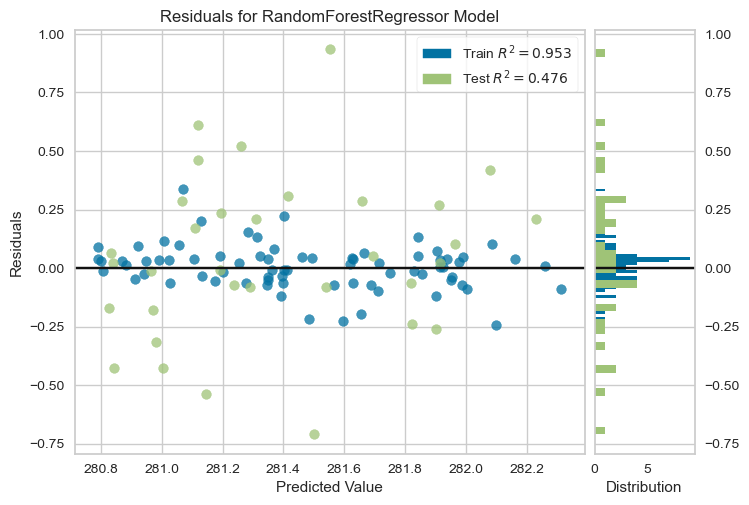

In [61]:
# PLotting the residuals for the four models
plot_model(four_models, plot = 'residuals')

In [256]:
# Creating svm model
svm = create_model('svm', return_train_score = True)

In [257]:
svm = pull() # To get the results as a dataframe

In [258]:
svm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1861  0.0562  0.2371  0.6997  0.0008  0.0007
         1     0.1779  0.0514  0.2268  0.7293  0.0008  0.0006
         2     0.1824  0.0546  0.2337  0.7123  0.0008  0.0006
         3     0.1792  0.0471  0.2170  0.7379  0.0008  0.0006
         4     0.1944  0.0586  0.2420  0.6722  0.0009  0.0007
         5     0.1864  0.0536  0.2315  0.7110  0.0008  0.0007
         6     0.1938  0.0558  0.2362  0.7188  0.0008  0.0007
         7     0.1810  0.0495  0.2226  0.7536  0.0008  0.0006
         8     0.1801  0.0523  0.2286  0.7347  0.0008  0.0006
         9     0.1678  0.0462  0.2148  0.7324  0.0008  0.0006
CV-Val   0     0.2076  0.0576  0.2399  0.4849  0.0008  0.0007
         1     0.2650  0.0843  0.2904  0.3926  0.0010  0.0009
         2     0.2357  0.0677  0.2602  0.6012  0.0009  0.0008
         3     0.2387  0.1192  0.3453  0.2020  0.0012  0.0008
         4     0.1543  0.0387  0.1967  0.8572  0.0007  0.0005
         5     0.2043  0.0601  0.2452  0.4598  0.0009  0.0007
         6     0.0672  0.0091  0.0954  0.8526  0.0003  0.0002
         7     0.2862  0.0997  0.3158 -0.5149  0.0011  0.0010
         8     0.2436  0.0831  0.2883 -0.7679  0.0010  0.0009
         9     0.3683  0.1461  0.3822  0.5743  0.0014  0.0013
CV-Train Mean  0.1829  0.0525  0.2290  0.7202  0.0008  0.0006
         Std   0.0074  0.0038  0.0084  0.0218  0.0000  0.0000
CV-Val   Mean  0.2271  0.0766  0.2659  0.3142  0.0009  0.0008
         Std   0.0756  0.0374  0.0764  0.5160  0.0003  0.0003
Train    NaN   0.1843  0.0525  0.2292  0.7212  0.0008  0.0007

In [259]:
# Creating xgboost model
xgboost = create_model('xgboost', return_train_score = True)

In [260]:
xgboost = pull() # To get the results as a dataframe

In [261]:
xgboost

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
         1     0.0013  0.0000  0.0018  1.0000  0.0000  0.0000
         2     0.0010  0.0000  0.0013  1.0000  0.0000  0.0000
         3     0.0010  0.0000  0.0012  1.0000  0.0000  0.0000
         4     0.0010  0.0000  0.0014  1.0000  0.0000  0.0000
         5     0.0012  0.0000  0.0016  1.0000  0.0000  0.0000
         6     0.0013  0.0000  0.0018  1.0000  0.0000  0.0000
         7     0.0012  0.0000  0.0016  1.0000  0.0000  0.0000
         8     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         9     0.0013  0.0000  0.0017  1.0000  0.0000  0.0000
CV-Val   0     0.1691  0.0539  0.2321  0.5181  0.0008  0.0006
         1     0.2291  0.0766  0.2767  0.4483  0.0010  0.0008
         2     0.2270  0.0656  0.2562  0.6135  0.0009  0.0008
         3     0.1859  0.1054  0.3247  0.2942  0.0012  0.0007
         4     0.1791  0.0573  0.2393  0.7887  0.0008  0.0006
         5     0.0966  0.0129  0.1138  0.8837  0.0004  0.0003
         6     0.1064  0.0211  0.1452  0.6587  0.0005  0.0004
         7     0.2430  0.1076  0.3281 -0.6351  0.0012  0.0009
         8     0.3254  0.1445  0.3802 -2.0733  0.0013  0.0012
         9     0.3419  0.1587  0.3984  0.5374  0.0014  0.0012
CV-Train Mean  0.0011  0.0000  0.0016  1.0000  0.0000  0.0000
         Std   0.0001  0.0000  0.0002  0.0000  0.0000  0.0000
CV-Val   Mean  0.2103  0.0804  0.2695  0.2034  0.0010  0.0007
         Std   0.0770  0.0460  0.0881  0.8571  0.0003  0.0003
Train    NaN   0.0011  0.0000  0.0014  1.0000  0.0000  0.0000

In [262]:
### Creating lm model
lm = create_model('lr', return_train_score = True)

In [263]:
lm = pull() # To get the results as a dataframe

In [264]:
lm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2627  0.1067  0.3266  0.4302  0.0012  0.0009
         1     0.2524  0.0942  0.3070  0.5039  0.0011  0.0009
         2     0.2725  0.1142  0.3379  0.3985  0.0012  0.0010
         3     0.2559  0.1017  0.3188  0.4340  0.0011  0.0009
         4     0.2634  0.1086  0.3295  0.3920  0.0012  0.0009
         5     0.2640  0.1062  0.3258  0.4273  0.0012  0.0009
         6     0.2750  0.1146  0.3386  0.4219  0.0012  0.0010
         7     0.2549  0.1014  0.3185  0.4955  0.0011  0.0009
         8     0.2700  0.1106  0.3326  0.4388  0.0012  0.0010
         9     0.2423  0.0960  0.3098  0.4437  0.0011  0.0009
CV-Val   0     0.2725  0.1101  0.3318  0.0151  0.0012  0.0010
         1     0.3756  0.2248  0.4741 -0.6191  0.0017  0.0013
         2     0.1807  0.0399  0.1997  0.7651  0.0007  0.0006
         3     0.3155  0.1560  0.3949 -0.0439  0.0014  0.0011
         4     0.2485  0.0886  0.2977  0.6729  0.0011  0.0009
         5     0.2646  0.1157  0.3402 -0.0397  0.0012  0.0009
         6     0.1446  0.0250  0.1582  0.5951  0.0006  0.0005
         7     0.3617  0.1662  0.4077 -1.5251  0.0014  0.0013
         8     0.1898  0.0656  0.2561 -0.3948  0.0009  0.0007
         9     0.4423  0.2109  0.4593  0.3853  0.0016  0.0016
CV-Train Mean  0.2613  0.1054  0.3245  0.4386  0.0011  0.0009
         Std   0.0095  0.0067  0.0103  0.0344  0.0000  0.0000
CV-Val   Mean  0.2796  0.1203  0.3320 -0.0189  0.0012  0.0010
         Std   0.0900  0.0649  0.1004  0.6638  0.0004  0.0003
Train    NaN   0.2619  0.1062  0.3258  0.4368  0.0012  0.0009

In [122]:
######## Analysing the performance of the model

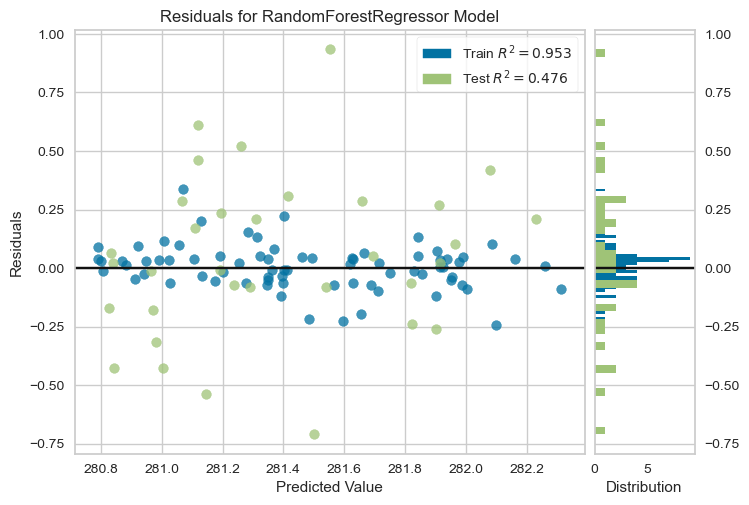

In [239]:
# PLotting the residuals
plot_model(best, plot = 'residuals')

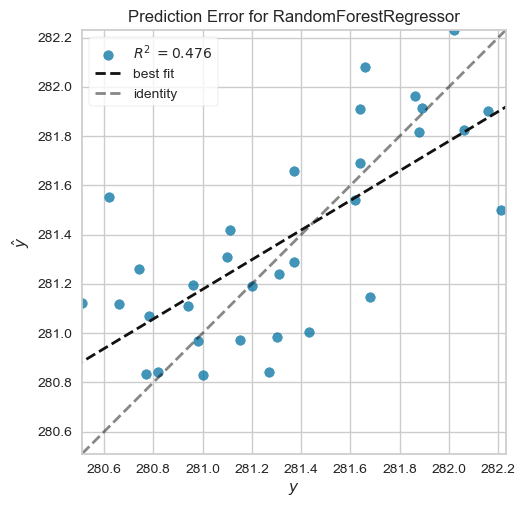

In [240]:
# PLotting the errors
plot_model(best, plot = 'error')

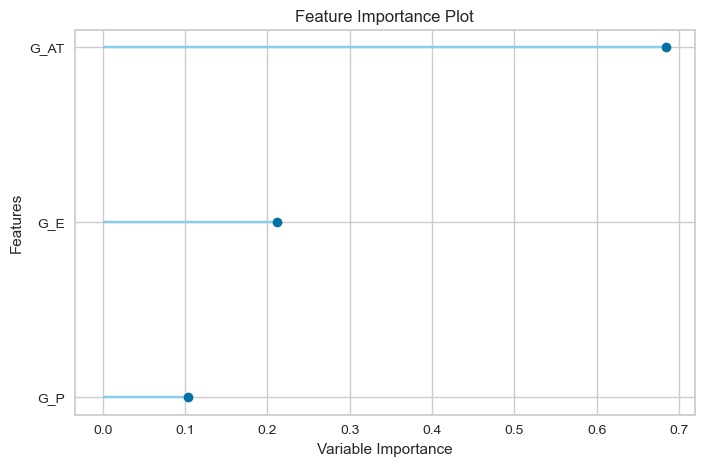

In [241]:
# Plotting the feature importance
plot_model(best, plot = 'feature')

In [242]:
# Analysing the performance of the model using evaluate_models\() function
evaluate_model(best)
#interactive(children=(toggleButtons(description='Plot Type:', icons = ('',), options = (('Pipeline Plot', 'pipeline')))))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [243]:
# Accessing all the variables created by setup() function
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [244]:
# Exporting X_train
from pycaret.datasets import get_data
X_train = get_config('X_train_transformed')

In [245]:
######## Prediction

In [246]:
# Prediction on the training dataset
train_pred = predict_model(best, data = X_train)

In [247]:
train_pred.head() # Showing the prediction dataframe

,G_E,G_AT,G_P,prediction_label
72,0.939759,0.258824,0.0,281.840197
21,0.433735,0.725490,0.0,281.840197
50,0.909639,0.666667,0.0,281.840197
94,0.572289,0.482353,0.0,281.840197
105,0.337349,0.725490,0.0,281.840197


In [248]:
# Prediction on the testing dataset
test_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2655,0.1178,0.3433,0.4756,0.0012,0.0009


In [249]:
test_pred.head() # Showing the prediction dataframe

,G_E,G_AT,G_P,R_LL,prediction_label
84,15.9,22.750000,0.000000,282.059998,281.822896
100,10.7,32.250000,0.000000,281.149994,280.970898
87,14.6,33.599998,0.000000,281.429993,281.003397
42,3.2,31.100000,64.099998,280.739990,281.262011
62,15.4,31.200001,0.000000,281.309998,281.238606


In [250]:
# Saving the model
save_model(best, 'gtrs_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['G_E', 'G_AT', 'G_P'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=123))]),
 'gtrs_best.pkl')

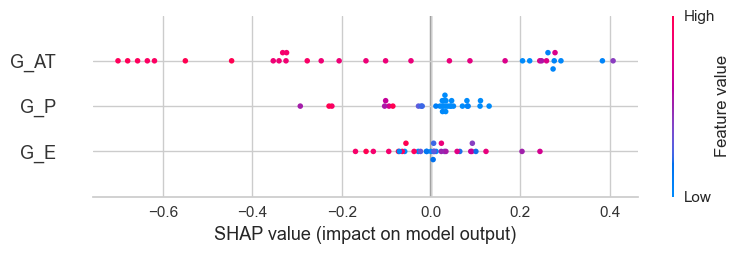

In [251]:
# Interpret Model SHAP
interpret_model(best, plot = 'summary')
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [252]:
# Reason plot
interpret_model(best, plot = 'reason', observation = 1)
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [253]:
# automl()

In [254]:
# dashboard(best, display_format = 'inline')

In [255]:
# Creating a gradio App
# create_app(best)

In [256]:
# Creating a POST API
create_api(best, api_name = 'gtrsbest_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python gtrsbest_api.py


In [258]:
# The best model
best = pull() # To get the results as a dataframe

In [259]:
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2655,0.1178,0.3433,0.4756,0.0012,0.0009


In [96]:
#####################################################################################################

In [97]:
############# Remote sensing climate data as input - Groundtruth LL data as output ############

In [265]:
# RS input - GT output
mydata = setup(data = rsgt, target = 'G_LL', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,G_LL
2,Target type,Regression
3,Original data shape,"(108, 4)"
4,Transformed data shape,"(108, 4)"
5,Transformed train set shape,"(75, 4)"
6,Transformed test set shape,"(33, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [266]:
mydata

In [267]:
# To see all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [268]:
######## Model comparison

In [269]:
# Comparing models baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3012,0.1369,0.3574,0.1488,0.0013,0.0011,0.3420
ridge,Ridge Regression,0.3382,0.1560,0.3888,0.0843,0.0014,0.0012,0.3230
br,Bayesian Ridge,0.3310,0.1540,0.3877,0.0765,0.0014,0.0012,0.3280
lar,Least Angle Regression,0.3265,0.1539,0.3879,0.0656,0.0014,0.0012,0.3600
lr,Linear Regression,0.3265,0.1539,0.3879,0.0655,0.0014,0.0012,0.3450
huber,Huber Regressor,0.3245,0.1598,0.3951,0.0098,0.0014,0.0012,0.4240
knn,K Neighbors Regressor,0.3145,0.1524,0.3773,0.0037,0.0013,0.0011,0.3470
rf,Random Forest Regressor,0.3065,0.1561,0.3717,-0.0205,0.0013,0.0011,0.3910
xgboost,Extreme Gradient Boosting,0.3187,0.1638,0.3835,-0.0367,0.0014,0.0011,0.3780
et,Extra Trees Regressor,0.3071,0.1547,0.3688,-0.0636,0.0013,0.0011,0.3820


In [270]:
# To return the four best models based on the mse values
top4_best_models = compare_models(sort = 'MSE', n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3012,0.1369,0.3574,0.1488,0.0013,0.0011,0.3380
knn,K Neighbors Regressor,0.3145,0.1524,0.3773,0.0037,0.0013,0.0011,0.3210
lar,Least Angle Regression,0.3265,0.1539,0.3879,0.0656,0.0014,0.0012,0.3220
lr,Linear Regression,0.3265,0.1539,0.3879,0.0655,0.0014,0.0012,0.3700
br,Bayesian Ridge,0.3310,0.1540,0.3877,0.0765,0.0014,0.0012,0.3710
et,Extra Trees Regressor,0.3071,0.1547,0.3688,-0.0636,0.0013,0.0011,0.3810
ridge,Ridge Regression,0.3382,0.1560,0.3888,0.0843,0.0014,0.0012,0.3380
rf,Random Forest Regressor,0.3065,0.1561,0.3717,-0.0205,0.0013,0.0011,0.3760
huber,Huber Regressor,0.3245,0.1598,0.3951,0.0098,0.0014,0.0012,0.3200
xgboost,Extreme Gradient Boosting,0.3187,0.1638,0.3835,-0.0367,0.0014,0.0011,0.3490


In [271]:
top4_best_models

[LGBMRegressor(n_jobs=-1, random_state=123),
 KNeighborsRegressor(n_jobs=-1),
 Lars(random_state=123),
 LinearRegression(n_jobs=-1)]

In [272]:
top4_best_models = pull() # To get the results as a dataframe

In [273]:
top4_best_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3012,0.1369,0.3574,0.1488,0.0013,0.0011,0.338
knn,K Neighbors Regressor,0.3145,0.1524,0.3773,0.0037,0.0013,0.0011,0.321
lar,Least Angle Regression,0.3265,0.1539,0.3879,0.0656,0.0014,0.0012,0.322
lr,Linear Regression,0.3265,0.1539,0.3879,0.0655,0.0014,0.0012,0.370
br,Bayesian Ridge,0.3310,0.1540,0.3877,0.0765,0.0014,0.0012,0.371
et,Extra Trees Regressor,0.3071,0.1547,0.3688,-0.0636,0.0013,0.0011,0.381
ridge,Ridge Regression,0.3382,0.1560,0.3888,0.0843,0.0014,0.0012,0.338
rf,Random Forest Regressor,0.3065,0.1561,0.3717,-0.0205,0.0013,0.0011,0.376
huber,Huber Regressor,0.3245,0.1598,0.3951,0.0098,0.0014,0.0012,0.320
xgboost,Extreme Gradient Boosting,0.3187,0.1638,0.3835,-0.0367,0.0014,0.0011,0.349


In [274]:
# Creating lightgbm model
lightgbm = create_model('lightgbm', return_train_score = True)

In [275]:
lightgbm = pull() # To get the results as a dataframe

In [276]:
lightgbm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2466  0.0936  0.3060  0.6394  0.0011  0.0009
         1     0.2423  0.0895  0.2991  0.6418  0.0011  0.0009
         2     0.2732  0.1105  0.3325  0.5902  0.0012  0.0010
         3     0.2632  0.1076  0.3280  0.5741  0.0012  0.0009
         4     0.2532  0.0992  0.3150  0.6124  0.0011  0.0009
         5     0.2511  0.0976  0.3124  0.6414  0.0011  0.0009
         6     0.2548  0.1001  0.3165  0.6299  0.0011  0.0009
         7     0.2256  0.0827  0.2876  0.7028  0.0010  0.0008
         8     0.2413  0.0918  0.3030  0.6408  0.0011  0.0009
         9     0.2377  0.0886  0.2977  0.6385  0.0011  0.0008
CV-Val   0     0.3650  0.1916  0.4377 -0.0840  0.0016  0.0013
         1     0.3619  0.1910  0.4370  0.4710  0.0016  0.0013
         2     0.1871  0.0438  0.2092  0.7286  0.0007  0.0007
         3     0.2838  0.1150  0.3391 -0.0817  0.0012  0.0010
         4     0.2331  0.0736  0.2714  0.7603  0.0010  0.0008
         5     0.2753  0.1216  0.3486 -0.2335  0.0012  0.0010
         6     0.2160  0.0605  0.2460  0.6126  0.0009  0.0008
         7     0.4177  0.2653  0.5151 -1.6859  0.0018  0.0015
         8     0.2591  0.0971  0.3116  0.5029  0.0011  0.0009
         9     0.4135  0.2098  0.4580  0.4978  0.0016  0.0015
CV-Train Mean  0.2489  0.0961  0.3098  0.6311  0.0011  0.0009
         Std   0.0128  0.0082  0.0132  0.0329  0.0000  0.0000
CV-Val   Mean  0.3012  0.1369  0.3574  0.1488  0.0013  0.0011
         Std   0.0785  0.0697  0.0960  0.6997  0.0003  0.0003
Train    NaN   0.2316  0.0880  0.2966  0.6637  0.0011  0.0008

In [277]:
# Creating knn model
knn = create_model('knn', return_train_score = True)

In [278]:
knn = pull() # To get the results as a dataframe

In [279]:
knn

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2377  0.0908  0.3013  0.6502  0.0011  0.0008
         1     0.2475  0.0903  0.3005  0.6384  0.0011  0.0009
         2     0.2643  0.1088  0.3299  0.5966  0.0012  0.0009
         3     0.2448  0.0900  0.3001  0.6436  0.0011  0.0009
         4     0.2649  0.1066  0.3265  0.5833  0.0012  0.0009
         5     0.2428  0.0915  0.3025  0.6639  0.0011  0.0009
         6     0.2667  0.1086  0.3295  0.5987  0.0012  0.0010
         7     0.2209  0.0759  0.2755  0.7274  0.0010  0.0008
         8     0.2435  0.0919  0.3031  0.6405  0.0011  0.0009
         9     0.2379  0.0886  0.2977  0.6387  0.0011  0.0009
CV-Val   0     0.2540  0.0955  0.3090  0.4597  0.0011  0.0009
         1     0.3757  0.1898  0.4356  0.4744  0.0016  0.0013
         2     0.2452  0.0871  0.2952  0.4599  0.0011  0.0009
         3     0.4200  0.2246  0.4739 -1.1124  0.0017  0.0015
         4     0.3050  0.1210  0.3478  0.6063  0.0012  0.0011
         5     0.2657  0.1274  0.3570 -0.2932  0.0013  0.0010
         6     0.1406  0.0398  0.1994  0.7453  0.0007  0.0005
         7     0.4700  0.3194  0.5652 -2.2335  0.0020  0.0017
         8     0.2977  0.1116  0.3340  0.4288  0.0012  0.0011
         9     0.3711  0.2082  0.4562  0.5017  0.0016  0.0013
CV-Train Mean  0.2471  0.0943  0.3067  0.6381  0.0011  0.0009
         Std   0.0138  0.0100  0.0163  0.0388  0.0001  0.0000
CV-Val   Mean  0.3145  0.1524  0.3773  0.0037  0.0013  0.0011
         Std   0.0915  0.0782  0.1002  0.9121  0.0004  0.0003
Train    NaN   0.2364  0.0890  0.2984  0.6597  0.0011  0.0008

In [280]:
# Creating lar model
lar = create_model('lar', return_train_score = True)

In [281]:
lar = pull() # To get the results as a dataframe

In [282]:
lar

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.3081  0.1324  0.3639  0.4900  0.0013  0.0011
         1     0.2914  0.1199  0.3463  0.5200  0.0012  0.0010
         2     0.2977  0.1274  0.3569  0.5278  0.0013  0.0011
         3     0.3047  0.1294  0.3598  0.4876  0.0013  0.0011
         4     0.3024  0.1289  0.3591  0.4963  0.0013  0.0011
         5     0.3119  0.1351  0.3676  0.5035  0.0013  0.0011
         6     0.3077  0.1323  0.3637  0.5110  0.0013  0.0011
         7     0.2909  0.1213  0.3482  0.5644  0.0012  0.0010
         8     0.3038  0.1308  0.3616  0.4882  0.0013  0.0011
         9     0.3031  0.1275  0.3571  0.4800  0.0013  0.0011
CV-Val   0     0.2765  0.1106  0.3326  0.3744  0.0012  0.0010
         1     0.4215  0.2259  0.4753  0.3743  0.0017  0.0015
         2     0.3170  0.1694  0.4116 -0.0501  0.0015  0.0011
         3     0.3489  0.1550  0.3937 -0.4576  0.0014  0.0012
         4     0.3505  0.1429  0.3780  0.5349  0.0013  0.0013
         5     0.2588  0.0842  0.2902  0.1454  0.0010  0.0009
         6     0.2204  0.1224  0.3499  0.2161  0.0012  0.0008
         7     0.4064  0.2419  0.4918 -1.4486  0.0018  0.0015
         8     0.3161  0.1272  0.3567  0.3485  0.0013  0.0011
         9     0.3485  0.1595  0.3993  0.6182  0.0014  0.0012
CV-Train Mean  0.3022  0.1285  0.3584  0.5069  0.0013  0.0011
         Std   0.0066  0.0046  0.0064  0.0241  0.0000  0.0000
CV-Val   Mean  0.3265  0.1539  0.3879  0.0656  0.0014  0.0012
         Std   0.0596  0.0466  0.0586  0.5835  0.0002  0.0002
Train    NaN   0.3043  0.1298  0.3602  0.5041  0.0013  0.0011

In [283]:
# Creating lm model
lm = create_model('lr', return_train_score = True)

In [284]:
lm = pull() # To get the results as a dataframe

In [285]:
lm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.3081  0.1324  0.3639  0.4900  0.0013  0.0011
         1     0.2914  0.1199  0.3463  0.5200  0.0012  0.0010
         2     0.2977  0.1274  0.3569  0.5278  0.0013  0.0011
         3     0.3047  0.1294  0.3598  0.4876  0.0013  0.0011
         4     0.3024  0.1289  0.3591  0.4963  0.0013  0.0011
         5     0.3119  0.1351  0.3676  0.5035  0.0013  0.0011
         6     0.3077  0.1323  0.3637  0.5110  0.0013  0.0011
         7     0.2909  0.1213  0.3482  0.5644  0.0012  0.0010
         8     0.3038  0.1308  0.3616  0.4882  0.0013  0.0011
         9     0.3031  0.1275  0.3571  0.4800  0.0013  0.0011
CV-Val   0     0.2765  0.1106  0.3326  0.3744  0.0012  0.0010
         1     0.4215  0.2259  0.4753  0.3743  0.0017  0.0015
         2     0.3170  0.1694  0.4116 -0.0501  0.0015  0.0011
         3     0.3489  0.1550  0.3937 -0.4576  0.0014  0.0012
         4     0.3505  0.1429  0.3780  0.5349  0.0013  0.0013
         5     0.2588  0.0842  0.2902  0.1454  0.0010  0.0009
         6     0.2204  0.1224  0.3499  0.2161  0.0012  0.0008
         7     0.4064  0.2419  0.4918 -1.4486  0.0018  0.0015
         8     0.3161  0.1272  0.3567  0.3485  0.0013  0.0011
         9     0.3485  0.1595  0.3993  0.6182  0.0014  0.0012
CV-Train Mean  0.3022  0.1285  0.3584  0.5069  0.0013  0.0011
         Std   0.0066  0.0046  0.0064  0.0241  0.0000  0.0000
CV-Val   Mean  0.3265  0.1539  0.3879  0.0655  0.0014  0.0012
         Std   0.0596  0.0466  0.0586  0.5835  0.0002  0.0002
Train    NaN   0.3043  0.1298  0.3602  0.5041  0.0013  0.0011

In [286]:
# Comparing four models
four_models = compare_models(include = ['lr', 'svm', 'rf', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,0.2785,0.1267,0.3315,0.1716,0.0012,0.0010,0.3270
lr,Linear Regression,0.3265,0.1539,0.3879,0.0655,0.0014,0.0012,0.3530
rf,Random Forest Regressor,0.3065,0.1561,0.3717,-0.0205,0.0013,0.0011,0.3740
xgboost,Extreme Gradient Boosting,0.3187,0.1638,0.3835,-0.0367,0.0014,0.0011,0.3300


In [287]:
four_models_results = pull() # To get the results as a dataframe

In [288]:
four_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,0.2785,0.1267,0.3315,0.1716,0.0012,0.0010,0.327
lr,Linear Regression,0.3265,0.1539,0.3879,0.0655,0.0014,0.0012,0.353
rf,Random Forest Regressor,0.3065,0.1561,0.3717,-0.0205,0.0013,0.0011,0.374
xgboost,Extreme Gradient Boosting,0.3187,0.1638,0.3835,-0.0367,0.0014,0.0011,0.330


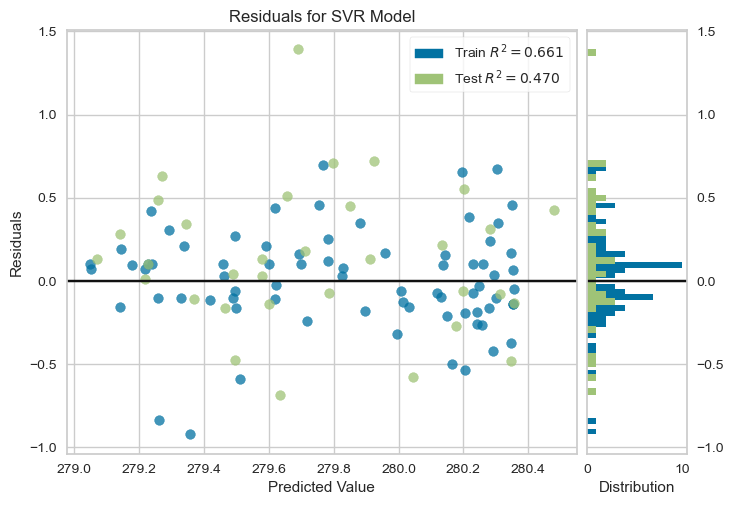

In [66]:
# PLotting the residuals for thr four models
plot_model(four_models, plot = 'residuals')

In [289]:
# Creating svm model
svm = create_model('svm', return_train_score = True)

In [290]:
svm = pull() # To get the results as a dataframe

In [291]:
svm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2266  0.0889  0.2982  0.6575  0.0011  0.0008
         1     0.2188  0.0843  0.2903  0.6625  0.0010  0.0008
         2     0.2334  0.0946  0.3076  0.6493  0.0011  0.0008
         3     0.2218  0.0844  0.2905  0.6659  0.0010  0.0008
         4     0.2380  0.0963  0.3103  0.6237  0.0011  0.0009
         5     0.2202  0.0895  0.2991  0.6712  0.0011  0.0008
         6     0.2354  0.0954  0.3089  0.6474  0.0011  0.0008
         7     0.2005  0.0768  0.2772  0.7241  0.0010  0.0007
         8     0.2251  0.0895  0.2991  0.6498  0.0011  0.0008
         9     0.2048  0.0751  0.2740  0.6939  0.0010  0.0007
CV-Val   0     0.2544  0.1009  0.3177  0.4291  0.0011  0.0009
         1     0.3084  0.1468  0.3831  0.5934  0.0014  0.0011
         2     0.1910  0.0534  0.2311  0.6689  0.0008  0.0007
         3     0.2903  0.1176  0.3429 -0.1056  0.0012  0.0010
         4     0.1842  0.0438  0.2093  0.8574  0.0007  0.0007
         5     0.2767  0.1029  0.3208 -0.0441  0.0011  0.0010
         6     0.1167  0.0201  0.1419  0.8711  0.0005  0.0004
         7     0.5018  0.3529  0.5941 -2.5727  0.0021  0.0018
         8     0.2325  0.0712  0.2667  0.6357  0.0009  0.0008
         9     0.4293  0.2577  0.5077  0.3831  0.0018  0.0015
CV-Train Mean  0.2225  0.0875  0.2955  0.6645  0.0011  0.0008
         Std   0.0117  0.0070  0.0120  0.0263  0.0000  0.0000
CV-Val   Mean  0.2785  0.1267  0.3315  0.1716  0.0012  0.0010
         Std   0.1091  0.0984  0.1297  0.9678  0.0005  0.0004
Train    NaN   0.2249  0.0886  0.2977  0.6613  0.0011  0.0008

In [292]:
# Creating rf model
rf = create_model('rf', return_train_score = True)

In [293]:
rf = pull() # To get the results as a dataframe

In [294]:
rf

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1031  0.0170  0.1306  0.9343  0.0005  0.0004
         1     0.1094  0.0202  0.1421  0.9191  0.0005  0.0004
         2     0.1154  0.0212  0.1455  0.9215  0.0005  0.0004
         3     0.1035  0.0181  0.1344  0.9285  0.0005  0.0004
         4     0.1094  0.0191  0.1381  0.9255  0.0005  0.0004
         5     0.1061  0.0187  0.1367  0.9314  0.0005  0.0004
         6     0.1112  0.0201  0.1417  0.9258  0.0005  0.0004
         7     0.0882  0.0146  0.1207  0.9477  0.0004  0.0003
         8     0.0998  0.0166  0.1289  0.9350  0.0005  0.0004
         9     0.0891  0.0132  0.1147  0.9464  0.0004  0.0003
CV-Val   0     0.3505  0.1650  0.4062  0.0668  0.0014  0.0013
         1     0.2703  0.1085  0.3294  0.6995  0.0012  0.0010
         2     0.1333  0.0362  0.1902  0.7759  0.0007  0.0005
         3     0.3328  0.1585  0.3981 -0.4904  0.0014  0.0012
         4     0.2041  0.0912  0.3021  0.7030  0.0011  0.0007
         5     0.2805  0.1036  0.3219 -0.0512  0.0011  0.0010
         6     0.1798  0.0383  0.1956  0.7550  0.0007  0.0006
         7     0.5351  0.4142  0.6436 -3.1925  0.0023  0.0019
         8     0.3137  0.1482  0.3850  0.2411  0.0014  0.0011
         9     0.4645  0.2977  0.5456  0.2874  0.0019  0.0017
CV-Train Mean  0.1035  0.0179  0.1333  0.9315  0.0005  0.0004
         Std   0.0086  0.0024  0.0093  0.0091  0.0000  0.0000
CV-Val   Mean  0.3065  0.1561  0.3717 -0.0205  0.0013  0.0011
         Std   0.1176  0.1115  0.1339  1.1283  0.0005  0.0004
Train    NaN   0.1045  0.0182  0.1349  0.9305  0.0005  0.0004

In [295]:
# Creating xgboost model
xgboost = create_model('xgboost', return_train_score = True)

In [296]:
xgboost = pull() # To get the results as a dataframe

In [297]:
xgboost

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0010  0.0000  0.0013  1.0000  0.0000  0.0000
         1     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         2     0.0012  0.0000  0.0016  1.0000  0.0000  0.0000
         3     0.0010  0.0000  0.0013  1.0000  0.0000  0.0000
         4     0.0009  0.0000  0.0012  1.0000  0.0000  0.0000
         5     0.0010  0.0000  0.0013  1.0000  0.0000  0.0000
         6     0.0012  0.0000  0.0016  1.0000  0.0000  0.0000
         7     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
         8     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         9     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
CV-Val   0     0.3264  0.1485  0.3854  0.1597  0.0014  0.0012
         1     0.2701  0.0970  0.3114  0.7313  0.0011  0.0010
         2     0.1526  0.0400  0.1999  0.7522  0.0007  0.0005
         3     0.2808  0.0969  0.3113  0.0884  0.0011  0.0010
         4     0.2476  0.1187  0.3445  0.6138  0.0012  0.0009
         5     0.3155  0.1349  0.3673 -0.3689  0.0013  0.0011
         6     0.2083  0.0719  0.2682  0.5394  0.0010  0.0007
         7     0.5544  0.4105  0.6407 -3.1553  0.0023  0.0020
         8     0.3154  0.1779  0.4217  0.0893  0.0015  0.0011
         9     0.5161  0.3415  0.5844  0.1825  0.0021  0.0018
CV-Train Mean  0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         Std   0.0001  0.0000  0.0002  0.0000  0.0000  0.0000
CV-Val   Mean  0.3187  0.1638  0.3835 -0.0367  0.0014  0.0011
         Std   0.1197  0.1133  0.1293  1.0919  0.0005  0.0004
Train    NaN   0.0012  0.0000  0.0016  1.0000  0.0000  0.0000

In [274]:
######## Analysing the performance of the model

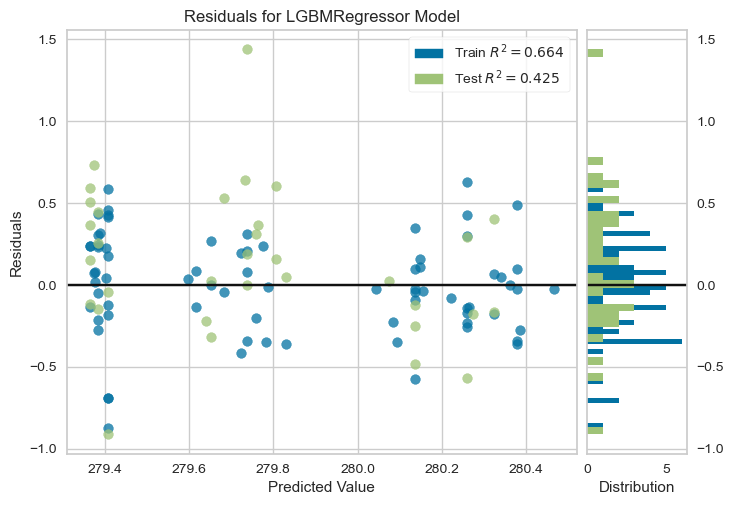

In [275]:
# PLotting the residuals
plot_model(best, plot = 'residuals')

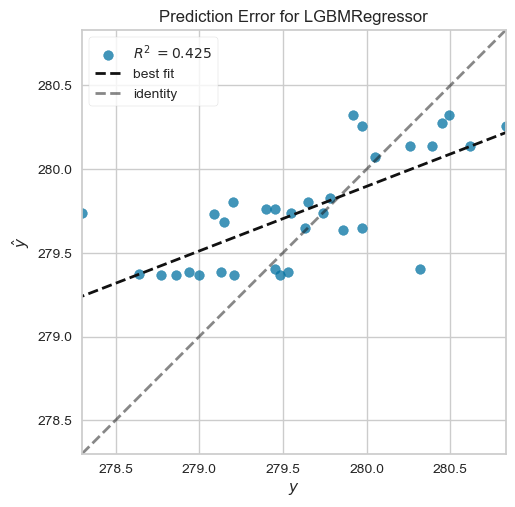

In [276]:
# PLotting the errors
plot_model(best, plot = 'error')

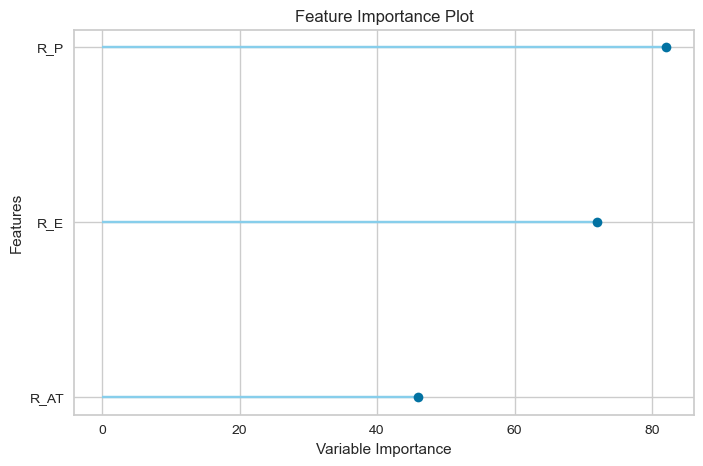

In [277]:
# Plotting the feature importance
plot_model(best, plot = 'feature')

In [278]:
# Analysing the performance of the model using evaluate_models\() function
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [279]:
# Accessing all the variables created by setup() function
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [280]:
# Exporting X_train
from pycaret.datasets import get_data
X_train = get_config('X_train_transformed')

In [281]:
######## Prediction

In [282]:
# Prediction on the training dataset
train_pred = predict_model(best, data = X_train)

In [283]:
train_pred.head() # Showing the prediction dataframe

,R_E,R_AT,R_P,prediction_label
72,0.001392,0.194578,0.000261,280.259917
21,0.448791,0.492574,0.096186,280.136639
50,0.001082,0.518220,0.001957,280.259917
94,0.041227,0.450698,0.000043,280.259917
105,0.370094,0.751526,0.111449,280.136639


In [284]:
# Prediction on the testing dataset
test_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3519,0.2109,0.4592,0.4245,0.0016,0.0013


In [285]:
test_pred.head() # Showing the prediction dataframe

,R_E,R_AT,R_P,G_LL,prediction_label
84,0.612919,22.286737,0.060000,280.619995,280.136639
100,7.432651,31.986414,4.630000,279.549988,279.738052
87,1.795772,31.717493,1.420000,279.970001,279.651053
42,75.063759,29.896845,158.259995,278.640015,279.375194
62,0.841100,29.749628,8.030000,279.859985,279.639142


In [286]:
# Saving the model
save_model(best, 'rsgt_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['R_E', 'R_AT', 'R_P'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'rsgt_best.pkl')

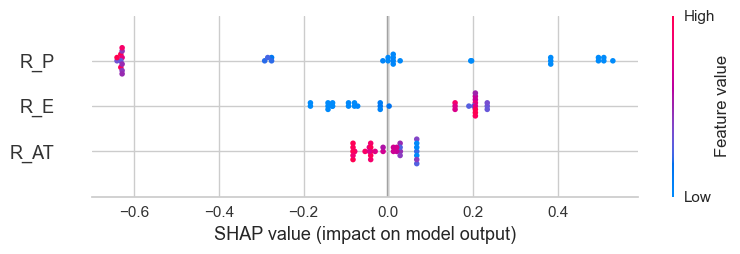

In [287]:
# Interpret Model SHAP
interpret_model(best, plot = 'summary')

In [288]:
# Reason plot
interpret_model(best, plot = 'reason', observation = 1)
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [289]:
#automl()

In [290]:
## Dashboard
#dashboard(best, display_format = 'inline')

In [291]:
# Creating a gradio App
#create_app(best)

In [292]:
# Creating a POST API
create_api(best, api_name = 'rsgtbest_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python rsgtbest_api.py


In [293]:
# The best model
best = pull() # To get the results as a dataframe

In [294]:
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3519,0.2109,0.4592,0.4245,0.0016,0.0013


In [129]:
##########################################################################################@@@@@@@@@@@

In [295]:
############# Groundtruth climate data as input - Groundtruth LL data as output ############

In [298]:
# GT input - GT output
mydata = setup(data = gtgt, target = 'G_LL', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,G_LL
2,Target type,Regression
3,Original data shape,"(108, 4)"
4,Transformed data shape,"(108, 4)"
5,Transformed train set shape,"(75, 4)"
6,Transformed test set shape,"(33, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [299]:
mydata

In [300]:
# To see all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [301]:
######## Model comparison

In [302]:
# Comparing models baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2315,0.0889,0.2820,0.4231,0.0010,0.0008,0.3970
ada,AdaBoost Regressor,0.2409,0.0957,0.2931,0.3846,0.0010,0.0009,0.3650
et,Extra Trees Regressor,0.2402,0.0995,0.2955,0.3593,0.0011,0.0009,0.4030
gbr,Gradient Boosting Regressor,0.2500,0.1031,0.3071,0.3357,0.0011,0.0009,0.3860
knn,K Neighbors Regressor,0.2593,0.1074,0.3080,0.3353,0.0011,0.0009,0.3550
lightgbm,Light Gradient Boosting Machine,0.2689,0.1196,0.3266,0.2710,0.0012,0.0010,0.3500
br,Bayesian Ridge,0.3120,0.1384,0.3604,0.1949,0.0013,0.0011,0.3410
ridge,Ridge Regression,0.3207,0.1416,0.3655,0.1915,0.0013,0.0011,0.3260
lr,Linear Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.3430
lar,Least Angle Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.3250


In [303]:
# To return the four best models based on the mse values
top4_best_models = compare_models(sort = 'MSE', n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2315,0.0889,0.2820,0.4231,0.0010,0.0008,0.3760
ada,AdaBoost Regressor,0.2409,0.0957,0.2931,0.3846,0.0010,0.0009,0.3420
et,Extra Trees Regressor,0.2402,0.0995,0.2955,0.3593,0.0011,0.0009,0.3930
gbr,Gradient Boosting Regressor,0.2500,0.1031,0.3071,0.3357,0.0011,0.0009,0.3610
knn,K Neighbors Regressor,0.2593,0.1074,0.3080,0.3353,0.0011,0.0009,0.3270
lightgbm,Light Gradient Boosting Machine,0.2689,0.1196,0.3266,0.2710,0.0012,0.0010,0.3220
xgboost,Extreme Gradient Boosting,0.2804,0.1264,0.3429,0.1835,0.0012,0.0010,0.3370
br,Bayesian Ridge,0.3120,0.1384,0.3604,0.1949,0.0013,0.0011,0.3630
lr,Linear Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.3510
lar,Least Angle Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.3290


In [304]:
top4_best_models

[RandomForestRegressor(n_jobs=-1, random_state=123),
 AdaBoostRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123)]

In [305]:
top4_best_models = pull() # To get the results as a dataframe

In [306]:
top4_best_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2315,0.0889,0.2820,0.4231,0.0010,0.0008,0.376
ada,AdaBoost Regressor,0.2409,0.0957,0.2931,0.3846,0.0010,0.0009,0.342
et,Extra Trees Regressor,0.2402,0.0995,0.2955,0.3593,0.0011,0.0009,0.393
gbr,Gradient Boosting Regressor,0.2500,0.1031,0.3071,0.3357,0.0011,0.0009,0.361
knn,K Neighbors Regressor,0.2593,0.1074,0.3080,0.3353,0.0011,0.0009,0.327
lightgbm,Light Gradient Boosting Machine,0.2689,0.1196,0.3266,0.2710,0.0012,0.0010,0.322
xgboost,Extreme Gradient Boosting,0.2804,0.1264,0.3429,0.1835,0.0012,0.0010,0.337
br,Bayesian Ridge,0.3120,0.1384,0.3604,0.1949,0.0013,0.0011,0.363
lr,Linear Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.351
lar,Least Angle Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.329


In [307]:
# Creating rf model
rf = create_model('rf', return_train_score = True)

In [308]:
rf = pull() # To get the results as a dataframe

In [309]:
rf

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0807  0.0111  0.1056  0.9571  0.0004  0.0003
         1     0.0773  0.0098  0.0989  0.9609  0.0004  0.0003
         2     0.0827  0.0116  0.1075  0.9571  0.0004  0.0003
         3     0.0750  0.0098  0.0992  0.9611  0.0004  0.0003
         4     0.0867  0.0126  0.1120  0.9509  0.0004  0.0003
         5     0.0799  0.0117  0.1083  0.9569  0.0004  0.0003
         6     0.0819  0.0116  0.1076  0.9572  0.0004  0.0003
         7     0.0839  0.0125  0.1118  0.9551  0.0004  0.0003
         8     0.0833  0.0124  0.1116  0.9513  0.0004  0.0003
         9     0.0760  0.0104  0.1018  0.9577  0.0004  0.0003
CV-Val   0     0.1578  0.0443  0.2104  0.7495  0.0007  0.0006
         1     0.2928  0.1444  0.3800  0.6001  0.0014  0.0010
         2     0.2114  0.0690  0.2627  0.5722  0.0009  0.0008
         3     0.2682  0.1245  0.3528 -0.1709  0.0013  0.0010
         4     0.1096  0.0166  0.1288  0.9460  0.0005  0.0004
         5     0.2297  0.0629  0.2507  0.3619  0.0009  0.0008
         6     0.1359  0.0233  0.1525  0.8510  0.0005  0.0005
         7     0.3732  0.1946  0.4411 -0.9699  0.0016  0.0013
         8     0.2290  0.0764  0.2764  0.6089  0.0010  0.0008
         9     0.3079  0.1330  0.3647  0.6816  0.0013  0.0011
CV-Train Mean  0.0807  0.0114  0.1064  0.9565  0.0004  0.0003
         Std   0.0035  0.0010  0.0047  0.0032  0.0000  0.0000
CV-Val   Mean  0.2315  0.0889  0.2820  0.4231  0.0010  0.0008
         Std   0.0780  0.0550  0.0967  0.5491  0.0003  0.0003
Train    NaN   0.0793  0.0113  0.1064  0.9567  0.0004  0.0003

In [310]:
# Creating ada model
ada = create_model('ada', return_train_score = True)

In [311]:
ada = pull() # To get the results as a dataframe

In [312]:
ada

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.1267  0.0226  0.1503  0.9130  0.0005  0.0005
         1     0.1391  0.0268  0.1637  0.8927  0.0006  0.0005
         2     0.1387  0.0285  0.1688  0.8944  0.0006  0.0005
         3     0.1462  0.0312  0.1766  0.8765  0.0006  0.0005
         4     0.1611  0.0363  0.1904  0.8583  0.0007  0.0006
         5     0.1388  0.0293  0.1712  0.8924  0.0006  0.0005
         6     0.1475  0.0305  0.1745  0.8874  0.0006  0.0005
         7     0.1326  0.0267  0.1633  0.9042  0.0006  0.0005
         8     0.1323  0.0269  0.1641  0.8946  0.0006  0.0005
         9     0.1231  0.0235  0.1532  0.9043  0.0005  0.0004
CV-Val   0     0.1742  0.0695  0.2637  0.6066  0.0009  0.0006
         1     0.2974  0.1387  0.3724  0.6159  0.0013  0.0011
         2     0.1945  0.0578  0.2404  0.6419  0.0009  0.0007
         3     0.2443  0.0819  0.2861  0.2299  0.0010  0.0009
         4     0.0823  0.0096  0.0981  0.9687  0.0003  0.0003
         5     0.2369  0.0770  0.2774  0.2188  0.0010  0.0008
         6     0.1644  0.0435  0.2085  0.7216  0.0007  0.0006
         7     0.4082  0.2231  0.4723 -1.2581  0.0017  0.0015
         8     0.2801  0.1055  0.3248  0.4597  0.0012  0.0010
         9     0.3264  0.1501  0.3874  0.6407  0.0014  0.0012
CV-Train Mean  0.1386  0.0282  0.1676  0.8918  0.0006  0.0005
         Std   0.0105  0.0037  0.0110  0.0147  0.0000  0.0000
CV-Val   Mean  0.2409  0.0957  0.2931  0.3846  0.0010  0.0009
         Std   0.0881  0.0582  0.0987  0.5869  0.0004  0.0003
Train    NaN   0.1489  0.0328  0.1810  0.8747  0.0006  0.0005

In [313]:
# Creating et model
et = create_model('et', return_train_score = True)

In [314]:
et = pull() # To get the results as a dataframe

In [315]:
et

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         1     0.0001  0.0000  0.0005  1.0000  0.0000  0.0000
         2     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         3     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         4     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         5     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         6     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         7     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         8     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         9     0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
CV-Val   0     0.1613  0.0531  0.2304  0.6996  0.0008  0.0006
         1     0.2577  0.1165  0.3414  0.6772  0.0012  0.0009
         2     0.2472  0.0856  0.2925  0.4696  0.0010  0.0009
         3     0.2657  0.1174  0.3426 -0.1041  0.0012  0.0010
         4     0.1095  0.0157  0.1253  0.9489  0.0004  0.0004
         5     0.2132  0.0557  0.2360  0.4347  0.0008  0.0008
         6     0.1429  0.0232  0.1523  0.8515  0.0005  0.0005
         7     0.3780  0.2426  0.4926 -1.4562  0.0018  0.0013
         8     0.2554  0.0898  0.2997  0.5402  0.0011  0.0009
         9     0.3710  0.1957  0.4424  0.5315  0.0016  0.0013
CV-Train Mean  0.0000  0.0000  0.0000  1.0000  0.0000  0.0000
         Std   0.0000  0.0000  0.0001  0.0000  0.0000  0.0000
CV-Val   Mean  0.2402  0.0995  0.2955  0.3593  0.0011  0.0009
         Std   0.0842  0.0690  0.1105  0.6632  0.0004  0.0003
Train    NaN   0.0000  0.0000  0.0000  1.0000  0.0000  0.0000

In [316]:
# Creating gbr model
gbr = create_model('gbr', return_train_score = True)

In [317]:
gbr = pull() # To get the results as a dataframe

In [318]:
gbr

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0407  0.0026  0.0514  0.9898  0.0002  0.0001
         1     0.0385  0.0022  0.0466  0.9913  0.0002  0.0001
         2     0.0353  0.0020  0.0445  0.9927  0.0002  0.0001
         3     0.0374  0.0022  0.0470  0.9913  0.0002  0.0001
         4     0.0463  0.0031  0.0555  0.9880  0.0002  0.0002
         5     0.0364  0.0022  0.0470  0.9919  0.0002  0.0001
         6     0.0405  0.0027  0.0518  0.9901  0.0002  0.0001
         7     0.0398  0.0028  0.0528  0.9900  0.0002  0.0001
         8     0.0356  0.0020  0.0445  0.9923  0.0002  0.0001
         9     0.0330  0.0017  0.0411  0.9931  0.0001  0.0001
CV-Val   0     0.1791  0.0647  0.2543  0.6341  0.0009  0.0006
         1     0.2768  0.1458  0.3819  0.5961  0.0014  0.0010
         2     0.2237  0.0782  0.2796  0.5155  0.0010  0.0008
         3     0.3123  0.1640  0.4050 -0.5424  0.0014  0.0011
         4     0.1560  0.0310  0.1762  0.8990  0.0006  0.0006
         5     0.2351  0.0648  0.2546  0.3421  0.0009  0.0008
         6     0.1380  0.0248  0.1575  0.8411  0.0006  0.0005
         7     0.3532  0.1999  0.4471 -1.0234  0.0016  0.0013
         8     0.2865  0.1061  0.3257  0.4568  0.0012  0.0010
         9     0.3391  0.1513  0.3890  0.6378  0.0014  0.0012
CV-Train Mean  0.0384  0.0023  0.0482  0.9910  0.0002  0.0001
         Std   0.0035  0.0004  0.0043  0.0015  0.0000  0.0000
CV-Val   Mean  0.2500  0.1031  0.3071  0.3357  0.0011  0.0009
         Std   0.0720  0.0567  0.0936  0.5904  0.0003  0.0003
Train    NaN   0.0462  0.0032  0.0562  0.9879  0.0002  0.0002

In [319]:
# Comparing four models
four_models = compare_models(include = ['lr', 'svm', 'rf', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2315,0.0889,0.2820,0.4231,0.0010,0.0008,0.3730
svm,Support Vector Regression,0.2490,0.1012,0.3005,0.3901,0.0011,0.0009,0.3320
lr,Linear Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.3430
xgboost,Extreme Gradient Boosting,0.2804,0.1264,0.3429,0.1835,0.0012,0.0010,0.3270


In [320]:
four_models_results = pull() # To get the results as a dataframe

In [321]:
four_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2315,0.0889,0.2820,0.4231,0.0010,0.0008,0.373
svm,Support Vector Regression,0.2490,0.1012,0.3005,0.3901,0.0011,0.0009,0.332
lr,Linear Regression,0.3099,0.1384,0.3601,0.1897,0.0013,0.0011,0.343
xgboost,Extreme Gradient Boosting,0.2804,0.1264,0.3429,0.1835,0.0012,0.0010,0.327


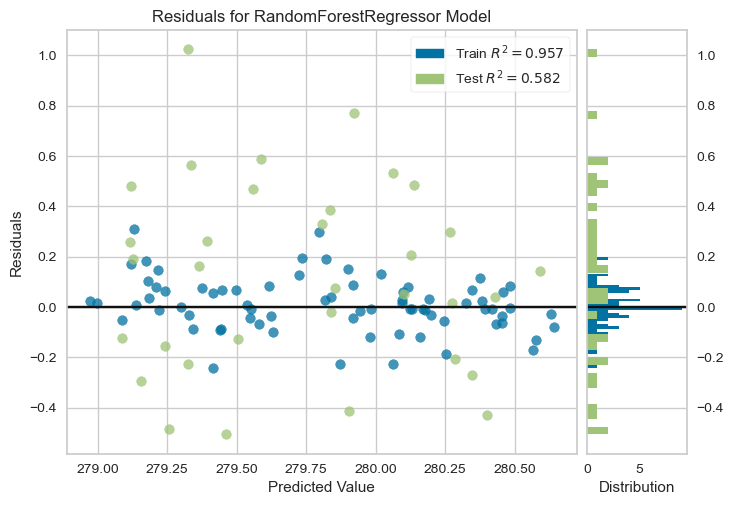

In [74]:
# PLotting the residuals for the four models
plot_model(four_models, plot = 'residuals')

In [322]:
# Creating svm model
svm = create_model('svm', return_train_score = True)

In [323]:
svm = pull() # To get the results as a dataframe

In [324]:
svm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2083  0.0746  0.2731  0.7127  0.0010  0.0007
         1     0.1977  0.0650  0.2549  0.7400  0.0009  0.0007
         2     0.2078  0.0735  0.2711  0.7276  0.0010  0.0007
         3     0.2067  0.0674  0.2597  0.7331  0.0009  0.0007
         4     0.2221  0.0779  0.2792  0.6955  0.0010  0.0008
         5     0.2042  0.0711  0.2666  0.7388  0.0009  0.0007
         6     0.2155  0.0759  0.2754  0.7196  0.0010  0.0008
         7     0.1909  0.0642  0.2535  0.7692  0.0009  0.0007
         8     0.2005  0.0671  0.2590  0.7375  0.0009  0.0007
         9     0.1909  0.0591  0.2430  0.7592  0.0009  0.0007
CV-Val   0     0.2297  0.0726  0.2695  0.5892  0.0010  0.0008
         1     0.3115  0.1472  0.3837  0.5923  0.0014  0.0011
         2     0.2143  0.0646  0.2542  0.5996  0.0009  0.0008
         3     0.2456  0.0909  0.3015  0.1453  0.0011  0.0009
         4     0.1013  0.0173  0.1316  0.9436  0.0005  0.0004
         5     0.2237  0.0680  0.2608  0.3097  0.0009  0.0008
         6     0.1224  0.0229  0.1512  0.8536  0.0005  0.0004
         7     0.3843  0.1962  0.4429 -0.9861  0.0016  0.0014
         8     0.2825  0.1288  0.3588  0.3407  0.0013  0.0010
         9     0.3748  0.2033  0.4509  0.5133  0.0016  0.0013
CV-Train Mean  0.2045  0.0696  0.2635  0.7333  0.0009  0.0007
         Std   0.0095  0.0057  0.0108  0.0203  0.0000  0.0000
CV-Val   Mean  0.2490  0.1012  0.3005  0.3901  0.0011  0.0009
         Std   0.0890  0.0623  0.1043  0.5122  0.0004  0.0003
Train    NaN   0.2062  0.0710  0.2664  0.7287  0.0009  0.0007

In [325]:
# Creating lm model
lm = create_model('lr', return_train_score = True)

In [326]:
lm = pull() # To get the results as a dataframe

In [327]:
lm

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.2875  0.1197  0.3460  0.5389  0.0012  0.0010
         1     0.2744  0.1050  0.3241  0.5795  0.0012  0.0010
         2     0.3008  0.1273  0.3568  0.5280  0.0013  0.0011
         3     0.2804  0.1158  0.3402  0.5417  0.0012  0.0010
         4     0.2992  0.1262  0.3552  0.5070  0.0013  0.0011
         5     0.2965  0.1245  0.3528  0.5427  0.0013  0.0011
         6     0.2872  0.1192  0.3453  0.5593  0.0012  0.0010
         7     0.2784  0.1123  0.3352  0.5965  0.0012  0.0010
         8     0.2865  0.1193  0.3455  0.5329  0.0012  0.0010
         9     0.2726  0.1087  0.3297  0.5568  0.0012  0.0010
CV-Val   0     0.2967  0.1188  0.3447  0.3277  0.0012  0.0011
         1     0.4374  0.2559  0.5058  0.2913  0.0018  0.0016
         2     0.1800  0.0489  0.2210  0.6972  0.0008  0.0006
         3     0.3481  0.1631  0.4038 -0.5338  0.0014  0.0012
         4     0.2047  0.0603  0.2455  0.8038  0.0009  0.0007
         5     0.2037  0.0654  0.2558  0.3360  0.0009  0.0007
         6     0.2652  0.1289  0.3590  0.1745  0.0013  0.0009
         7     0.4113  0.2039  0.4516 -1.0641  0.0016  0.0015
         8     0.3084  0.1188  0.3447  0.3916  0.0012  0.0011
         9     0.4439  0.2201  0.4691  0.4732  0.0017  0.0016
CV-Train Mean  0.2863  0.1178  0.3431  0.5483  0.0012  0.0010
         Std   0.0096  0.0070  0.0103  0.0245  0.0000  0.0000
CV-Val   Mean  0.3099  0.1384  0.3601  0.1897  0.0013  0.0011
         Std   0.0935  0.0676  0.0934  0.5387  0.0003  0.0003
Train    NaN   0.2881  0.1188  0.3446  0.5461  0.0012  0.0010

In [328]:
# Creating xgboost model
xgboost = create_model('xgboost', return_train_score = True)

In [329]:
xgboost = pull() # To get the results as a dataframe

In [330]:
xgboost

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         1     0.0012  0.0000  0.0017  1.0000  0.0000  0.0000
         2     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         3     0.0011  0.0000  0.0016  1.0000  0.0000  0.0000
         4     0.0012  0.0000  0.0015  1.0000  0.0000  0.0000
         5     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         6     0.0013  0.0000  0.0016  1.0000  0.0000  0.0000
         7     0.0011  0.0000  0.0016  1.0000  0.0000  0.0000
         8     0.0010  0.0000  0.0014  1.0000  0.0000  0.0000
         9     0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
CV-Val   0     0.1939  0.0572  0.2392  0.6764  0.0009  0.0007
         1     0.2930  0.1629  0.4036  0.5488  0.0014  0.0010
         2     0.2200  0.0670  0.2589  0.5845  0.0009  0.0008
         3     0.2928  0.1329  0.3646 -0.2500  0.0013  0.0010
         4     0.1870  0.0438  0.2092  0.8575  0.0007  0.0007
         5     0.2790  0.0940  0.3066  0.0459  0.0011  0.0010
         6     0.2405  0.1190  0.3449  0.2382  0.0012  0.0009
         7     0.4371  0.2815  0.5306 -1.8498  0.0019  0.0016
         8     0.2824  0.1045  0.3233  0.4649  0.0011  0.0010
         9     0.3786  0.2012  0.4486  0.5183  0.0016  0.0014
CV-Train Mean  0.0011  0.0000  0.0015  1.0000  0.0000  0.0000
         Std   0.0001  0.0000  0.0001  0.0000  0.0000  0.0000
CV-Val   Mean  0.2804  0.1264  0.3429  0.1835  0.0012  0.0010
         Std   0.0748  0.0691  0.0938  0.7434  0.0003  0.0003
Train    NaN   0.0012  0.0000  0.0015  1.0000  0.0000  0.0000

In [307]:
######## Analysing the performance of the model

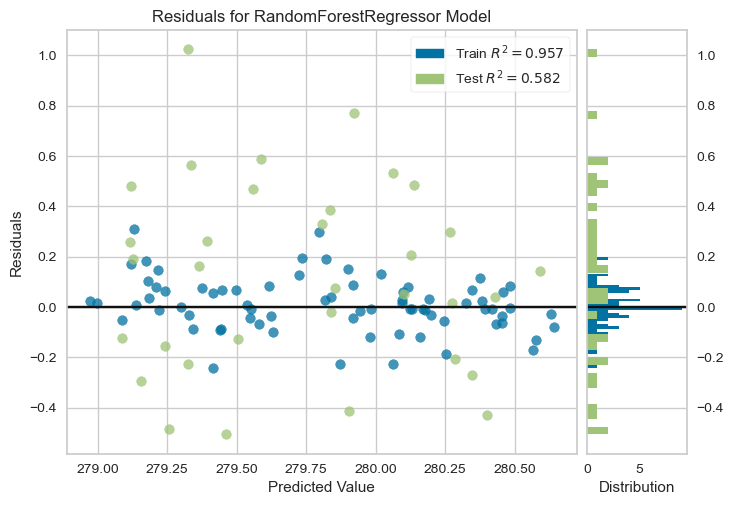

In [308]:
# PLotting the residuals
plot_model(best, plot = 'residuals')

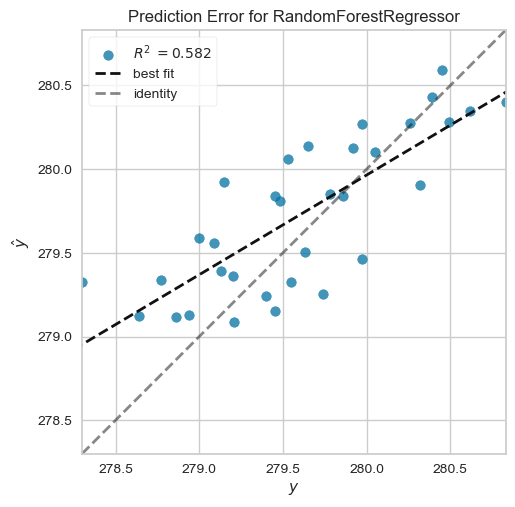

In [309]:
# PLotting the errors
plot_model(best, plot = 'error')

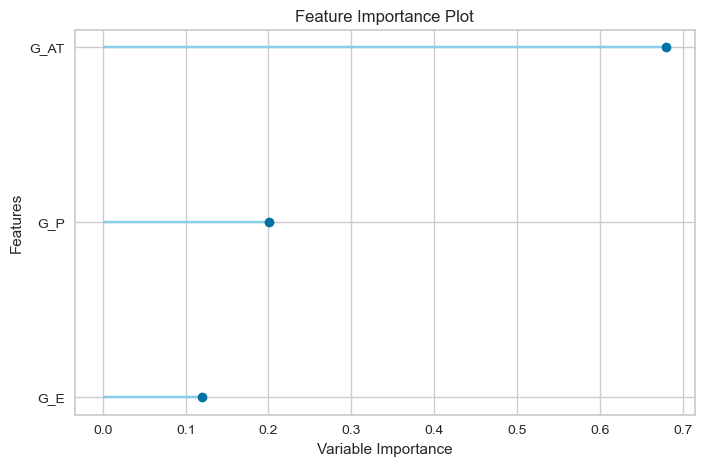

In [310]:
# Plotting the feature importance
plot_model(best, plot = 'feature')

In [311]:
# Analysing the performance of the model using evaluate_models\() function
evaluate_model(best)
#interactive(children=(toggleButtons(description='Plot Type:', icons = ('',), options = (('Pipeline Plot', 'pipeline')))))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [312]:
# Accessing all the variables created by setup() function
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [313]:
# Exporting X_train
from pycaret.datasets import get_data
X_train = get_config('X_train_transformed')

In [314]:
######## Prediction

In [315]:
# Prediction on the training dataset
train_pred = predict_model(best, data = X_train)

In [316]:
train_pred.head() # Showing the prediction dataframe

,G_E,G_AT,G_P,prediction_label
72,0.939759,0.258824,0.0,280.034101
21,0.433735,0.725490,0.0,280.034101
50,0.909639,0.666667,0.0,280.034101
94,0.572289,0.482353,0.0,280.034101
105,0.337349,0.725490,0.0,280.034101


In [317]:
# Prediction on the testing dataset
test_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3208,0.1531,0.3913,0.5822,0.0014,0.0011


In [318]:
test_pred.head() # Showing the prediction dataframe

,G_E,G_AT,G_P,G_LL,prediction_label
84,15.9,22.750000,0.000000,280.619995,280.348297
100,10.7,32.250000,0.000000,279.549988,279.324698
87,14.6,33.599998,0.000000,279.970001,279.463101
42,3.2,31.100000,64.099998,278.640015,279.121307
62,15.4,31.200001,0.000000,279.859985,279.839600


In [319]:
# Saving the model
save_model(best, 'gtgt_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['G_E', 'G_AT', 'G_P'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=123))]),
 'gtgt_best.pkl')

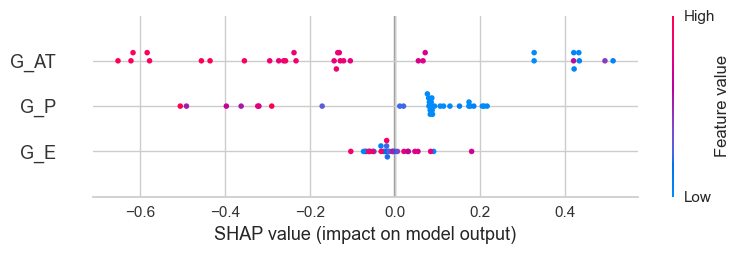

In [320]:
# Interpret Model SHAP
interpret_model(best, plot = 'summary')
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [321]:
# Reason plot
interpret_model(best, plot = 'reason', observation = 1)
# TypeError: This function only supports tree based models for binary classification: et, dt, xgboost, rf, lightgbm.

In [322]:
# automl()

In [323]:
# dashboard(best, display_format = 'inline')

In [324]:
# Creating a gradio App
# create_app(best)

In [325]:
# Creating a POST API
create_api(best, api_name = 'gtgtbest_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python gtgtbest_api.py


In [326]:
# The best model
best = pull() # To get the results as a dataframe

In [327]:
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3208,0.1531,0.3913,0.5822,0.0014,0.0011


In [160]:
######################################### END ##############################################